# Analytics

#### Date: 2021/01

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM: SysArq

##### Semester: 2021/01
##### Professor: Hilmer Neri

##### Members:

- Joao Gabriel Rossi
- Paulo Vitor Coelho
- Joao Matheus
- Ivan Diniz Dobbin
- Gabriel Marcolino
- Carlos Eduardo Roriz
- Lorenzo Santos

### LIBRARIES

In [13]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Datetime
from datetime import datetime

### GRAPH SETTINGS

In [14]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [16]:
jsons = glob('../analytics-raw-data/*.json') # add the path here

In [17]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"PC-GO1-(.*?)-*-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [18]:
base_component_df = create_base_component_df(jsons)

In [19]:
base_component_df.head(10)

bestValue                    metric value  \
9       True  duplicated_lines_density   0.0   
10       NaN                 functions    41   
11      True           security_rating   1.0   
12       NaN                     files    16   
13       NaN                complexity    42   
14       NaN                     ncloc   878   
15     False                  coverage  97.3   
16      True        reliability_rating   1.0   
17     False     comment_lines_density   7.7   
45      True  duplicated_lines_density   0.0   

                                             filename repository  \
9   fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
10  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
11  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
12  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
13  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
14  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
15  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
16  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
17  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   Archives   
45  fga-eps-mds-2021_1-PC-GO1-Archives-13-09-2021-...   Archives   

             version  
9   03-10-2021-15-47  
10  03-10-2021-15-47  
11  03-10-2021-15-47  
12  03-10-2021-15-47  
13  03-10-2021-15-47  
14  03-10-2021-15-47  
15  03-10-2021-15-47  
16  03-10-2021-15-47  
17  03-10-2021-15-47  
45  13-09-2021-15-00

#### Create dataframe per file

In [20]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [21]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns, dtype=object)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)
        
        file_component_df_py = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'py')
        file_component_df_js = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'js')

        file_component_df_py['filename'] = os.path.basename(i)
        file_component_df_js['filename'] = os.path.basename(i)

        df = df.append(file_component_df_js, ignore_index=True)
        df = df.append(file_component_df_py, ignore_index=True)
          
    aux_df = df['filename'].str.split(r"PC-GO1-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [22]:
file_component_df = create_file_df(jsons)

In [23]:
file_component_df.head(10)

path functions complexity  \
45  archives_app/migrations/0001_initial.py         0          0   
46                 archives_app/__init__.py         0          0   
47      archives_app/migrations/__init__.py         0          0   
48                      project/__init__.py         0          0   
49                    archives_app/admin.py         0          0   
50                     archives_app/apps.py         0          0   
51                          project/asgi.py         0          0   
52                                manage.py         1          2   
53                   archives_app/models.py         0          0   
54              archives_app/serializers.py         0          0   

   comment_lines_density duplicated_lines_density coverage ncloc  \
45                   1.2                      0.0      0.0    85   
46                   NaN                      0.0      NaN     0   
47                   NaN                      0.0      NaN     0   
48                   NaN                      0.0      NaN     0   
49                   NaN                      0.0      NaN     0   
50                   0.0                      0.0    100.0     3   
51                  66.7                      0.0      NaN     4   
52                  16.7                      0.0      NaN    15   
53                   0.0                      0.0    100.0    39   
54                   0.0                      0.0    100.0    65   

   security_rating tests test_success_density test_execution_time  \
45             1.0   NaN                100.0                 NaN   
46             1.0   NaN                100.0                 NaN   
47             1.0   NaN                100.0                 NaN   
48             1.0   NaN                100.0                 NaN   
49             1.0   NaN                100.0                 NaN   
50             1.0   NaN                100.0                 NaN   
51             1.0   NaN                100.0                 NaN   
52             1.0   NaN                100.0                 NaN   
53             1.0   NaN                100.0                 NaN   
54             1.0   NaN                100.0                 NaN   

   reliability_rating                                           filename  \
45                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
46                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
47                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
48                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
49                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
50                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
51                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
52                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
53                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   
54                1.0  fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...   

   repository           version  
45   Archives  03-10-2021-15-47  
46   Archives  03-10-2021-15-47  
47   Archives  03-10-2021-15-47  
48   Archives  03-10-2021-15-47  
49   Archives  03-10-2021-15-47  
50   Archives  03-10-2021-15-47  
51   Archives  03-10-2021-15-47  
52   Archives  03-10-2021-15-47  
53   Archives  03-10-2021-15-47  
54   Archives  03-10-2021-15-47

#### Create dataframe per repository

In [24]:
archives_df = file_component_df[file_component_df['repository'] == 'Archives']
profile_df = file_component_df[file_component_df['repository'] == 'Profile']
frontend_df = file_component_df[file_component_df['repository'] == 'Frontend']

### Metric calculations

##### COMPLEXITY

In [25]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [26]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [27]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### Calculate m1, m2 and m3 for each repository

In [28]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list})
        
    return metrics_df

In [29]:
archives_metrics = create_metrics_df(archives_df)
profile_metrics = create_metrics_df(profile_df)
frontend_metrics = create_metrics_df(frontend_df)

### Data visualization

- You must do this for each of your repositories

# ARCHIVES

## M1

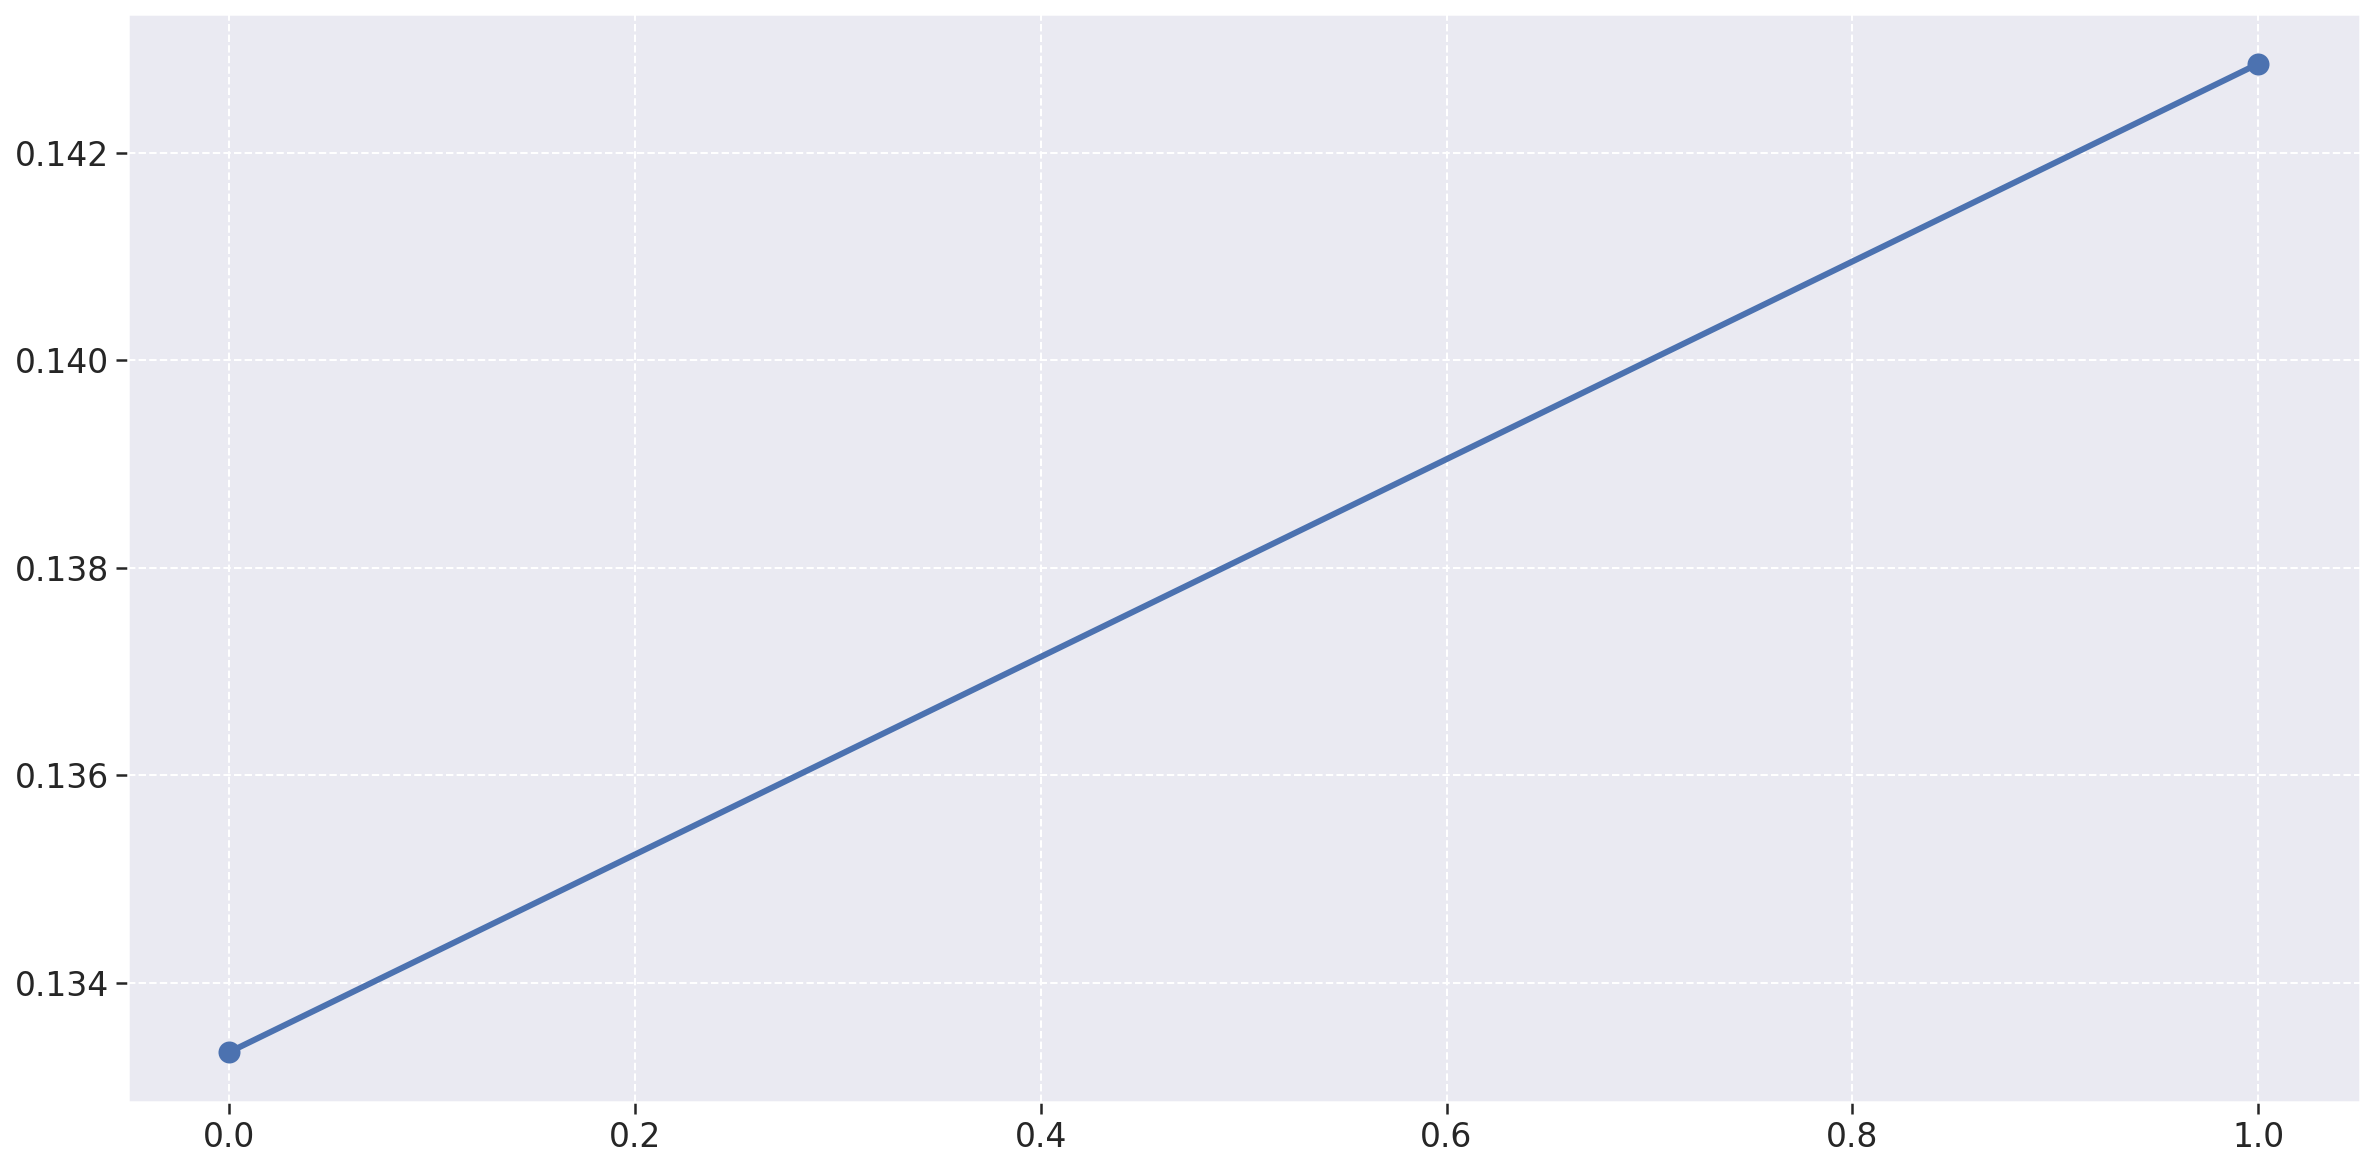

In [79]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['m1'], linewidth=3, marker='o', markersize=10)

## M2

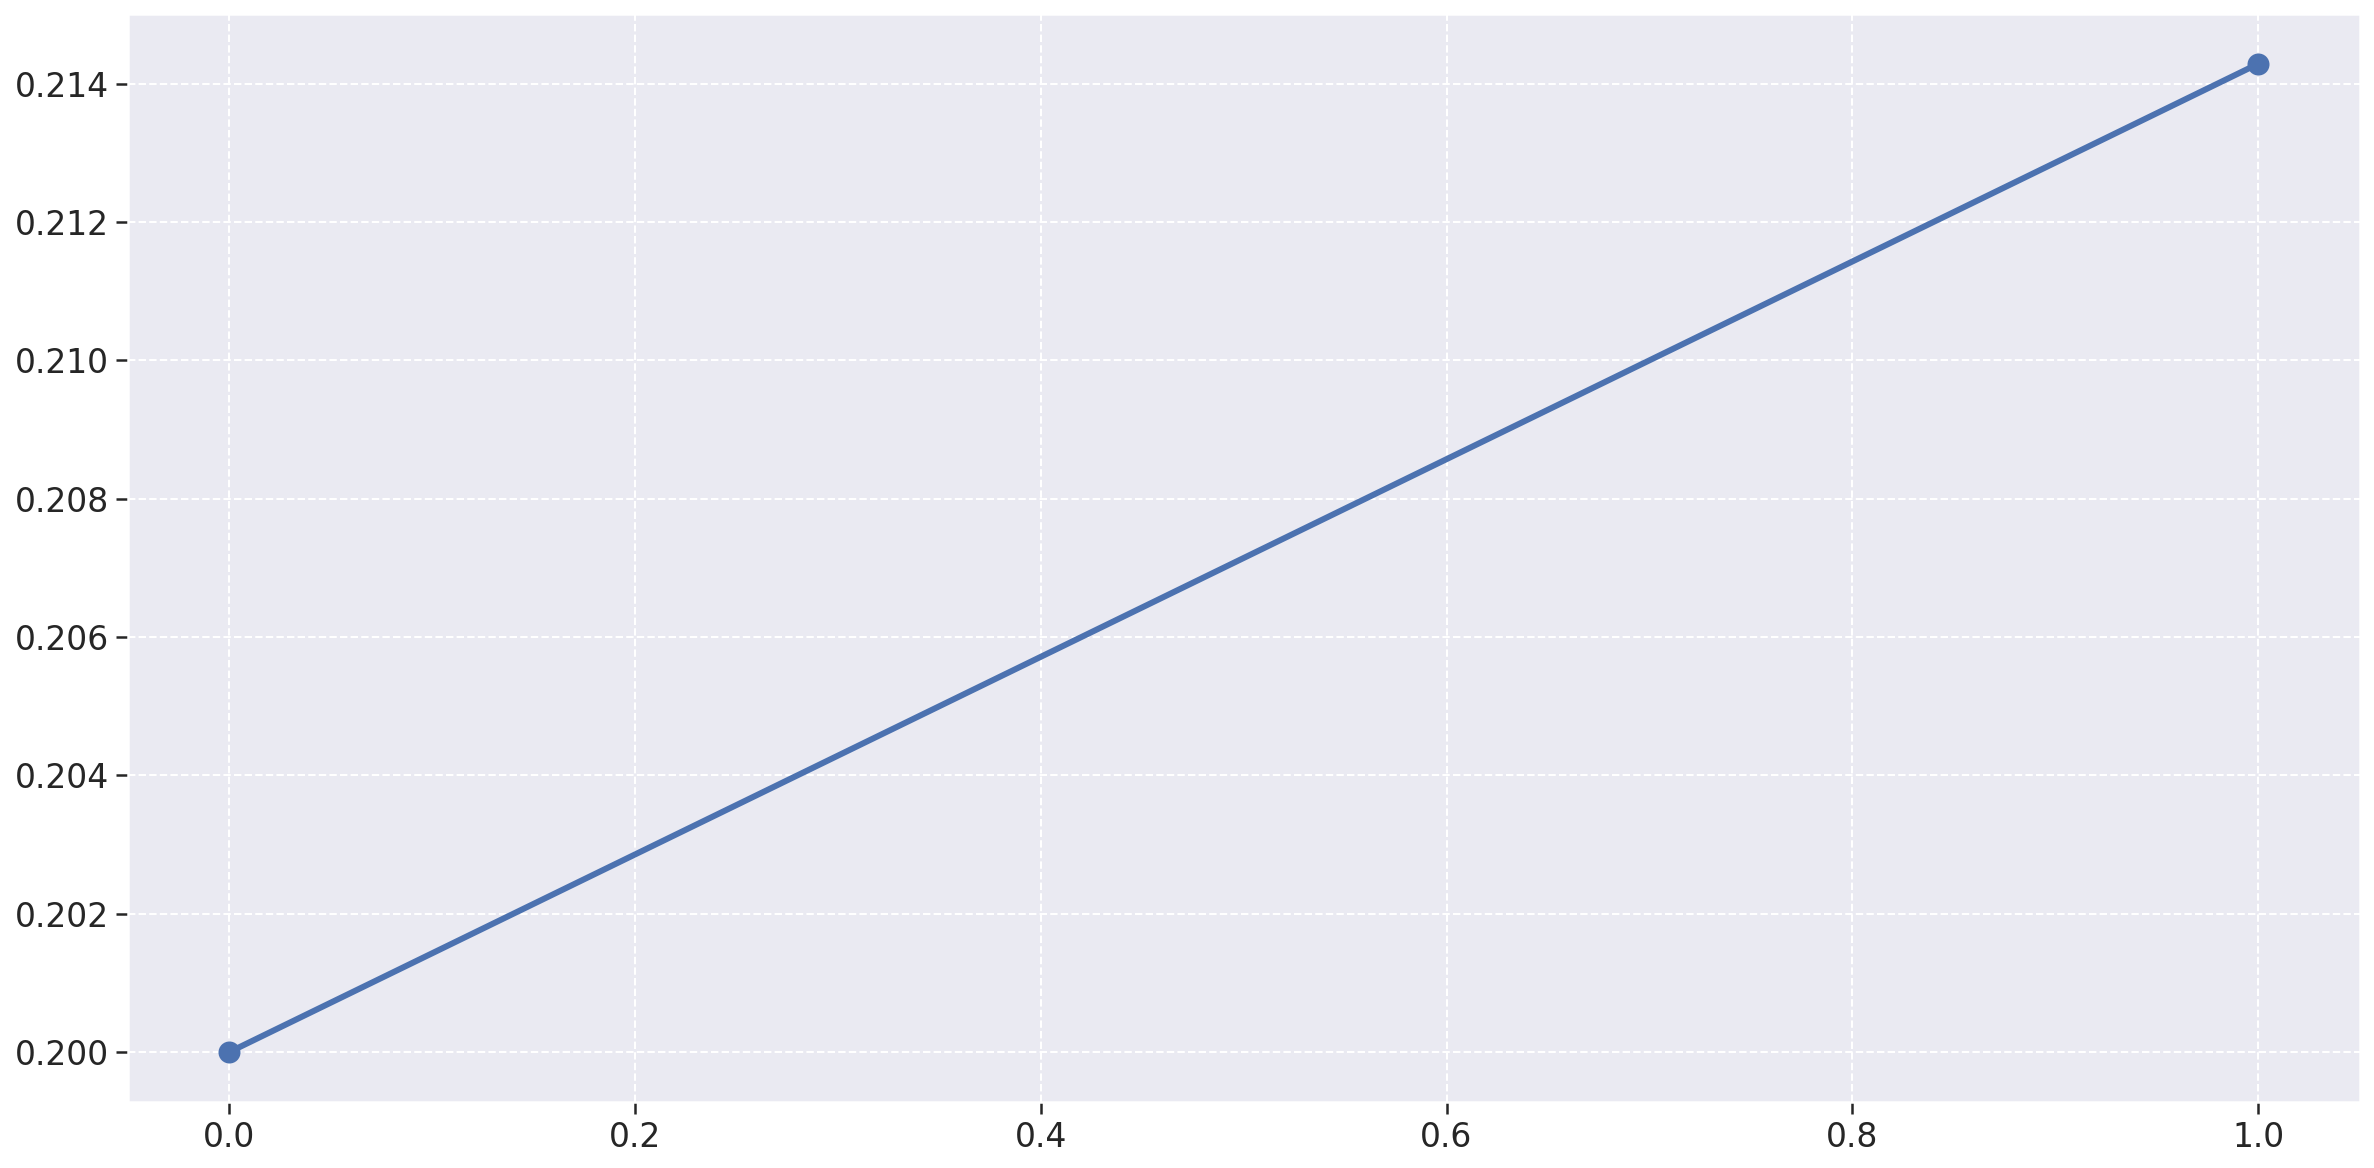

In [30]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['m2'], linewidth=3, marker='o', markersize=10)

## M3

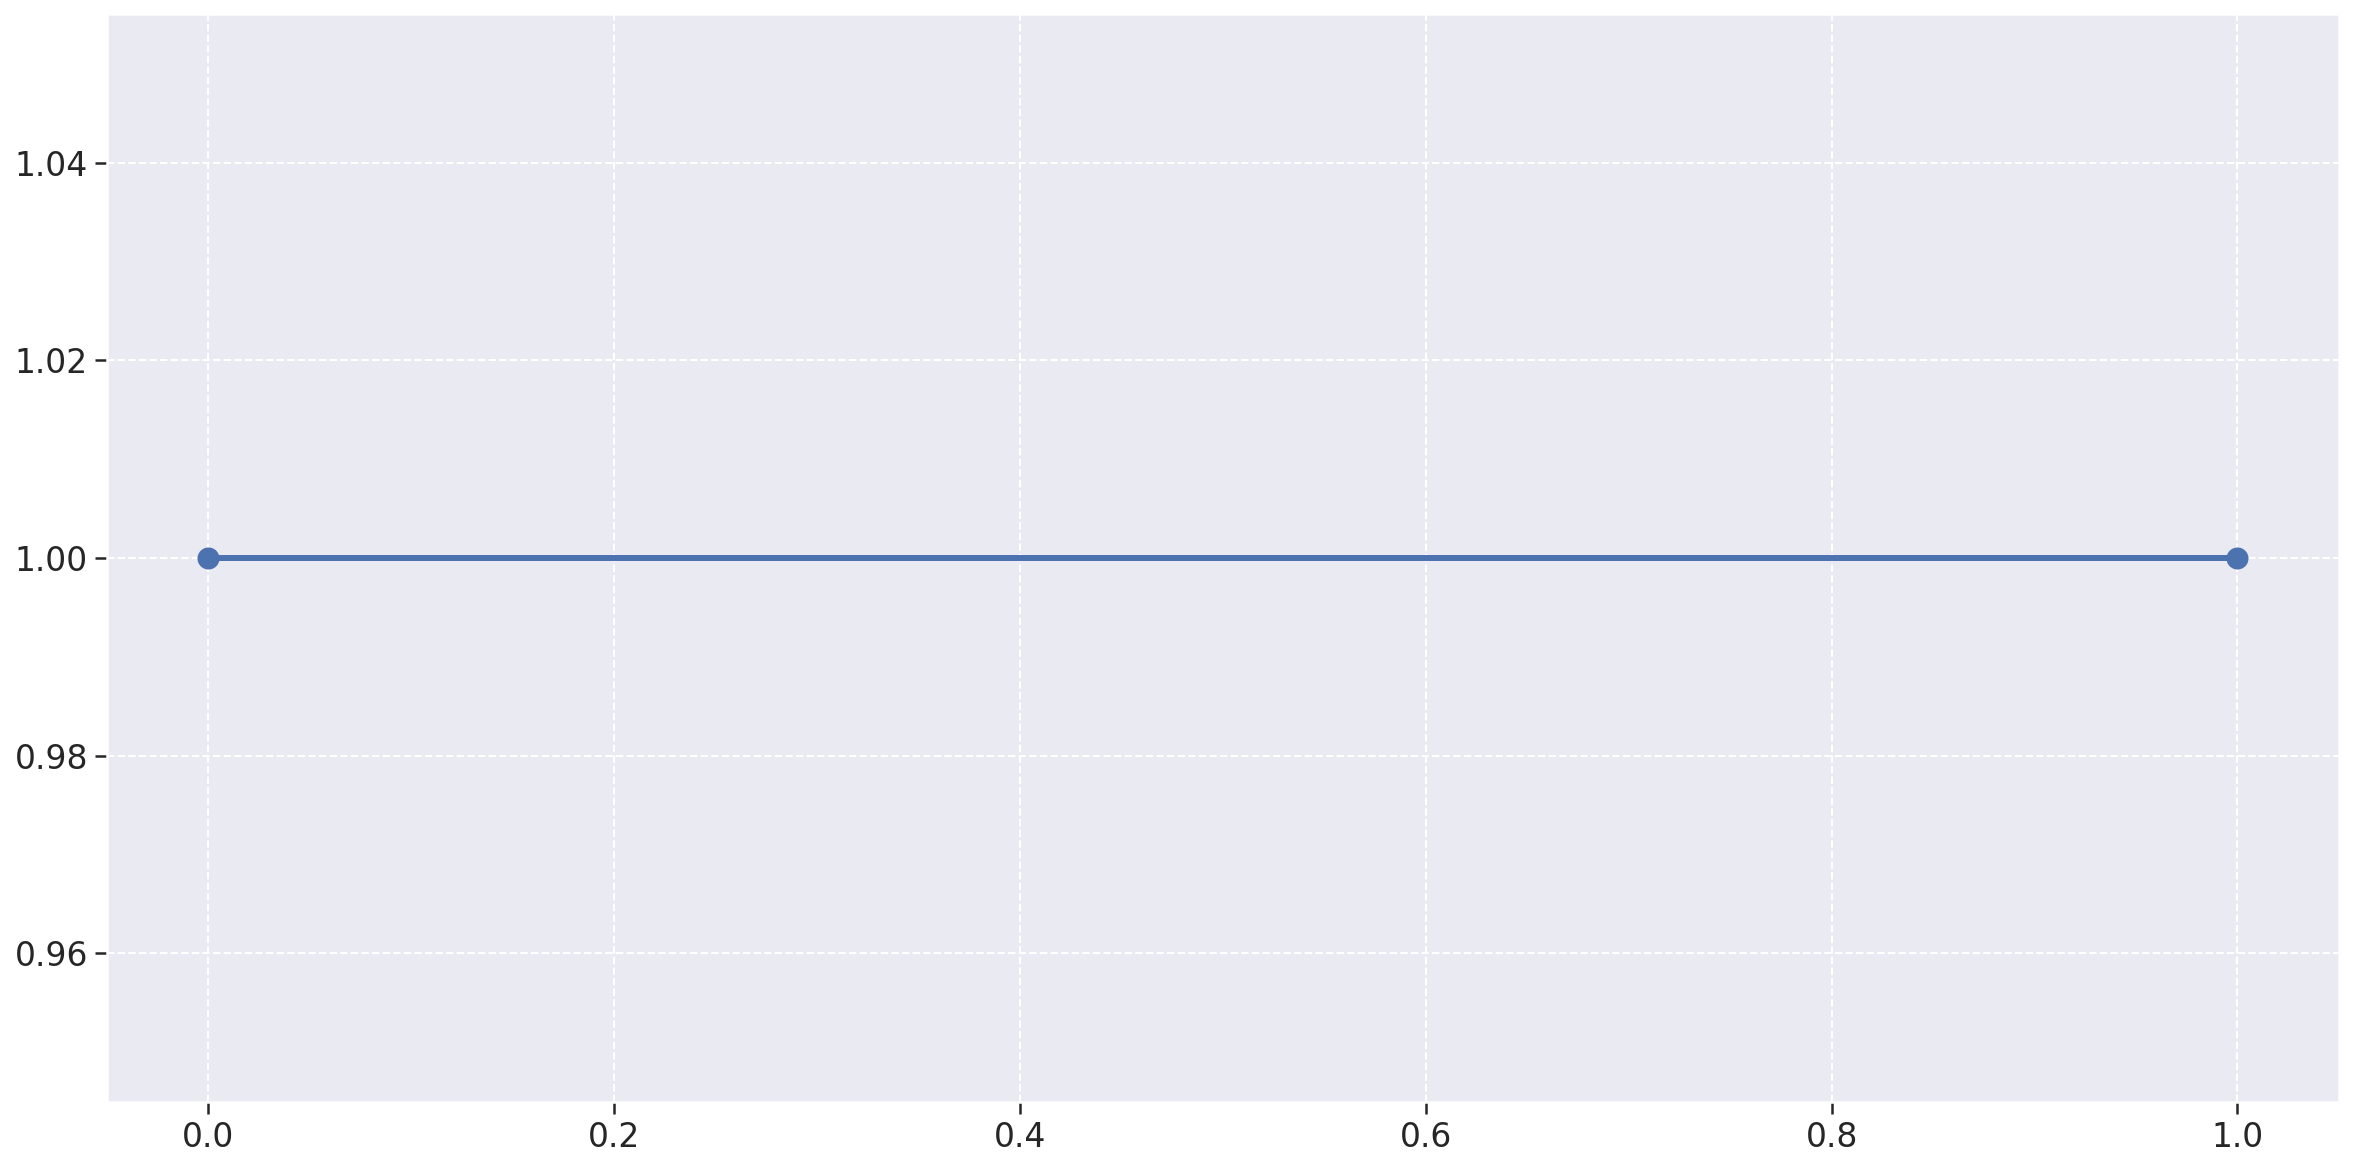

In [31]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['m3'], linewidth=3, marker='o', markersize=10)

## TOTAL

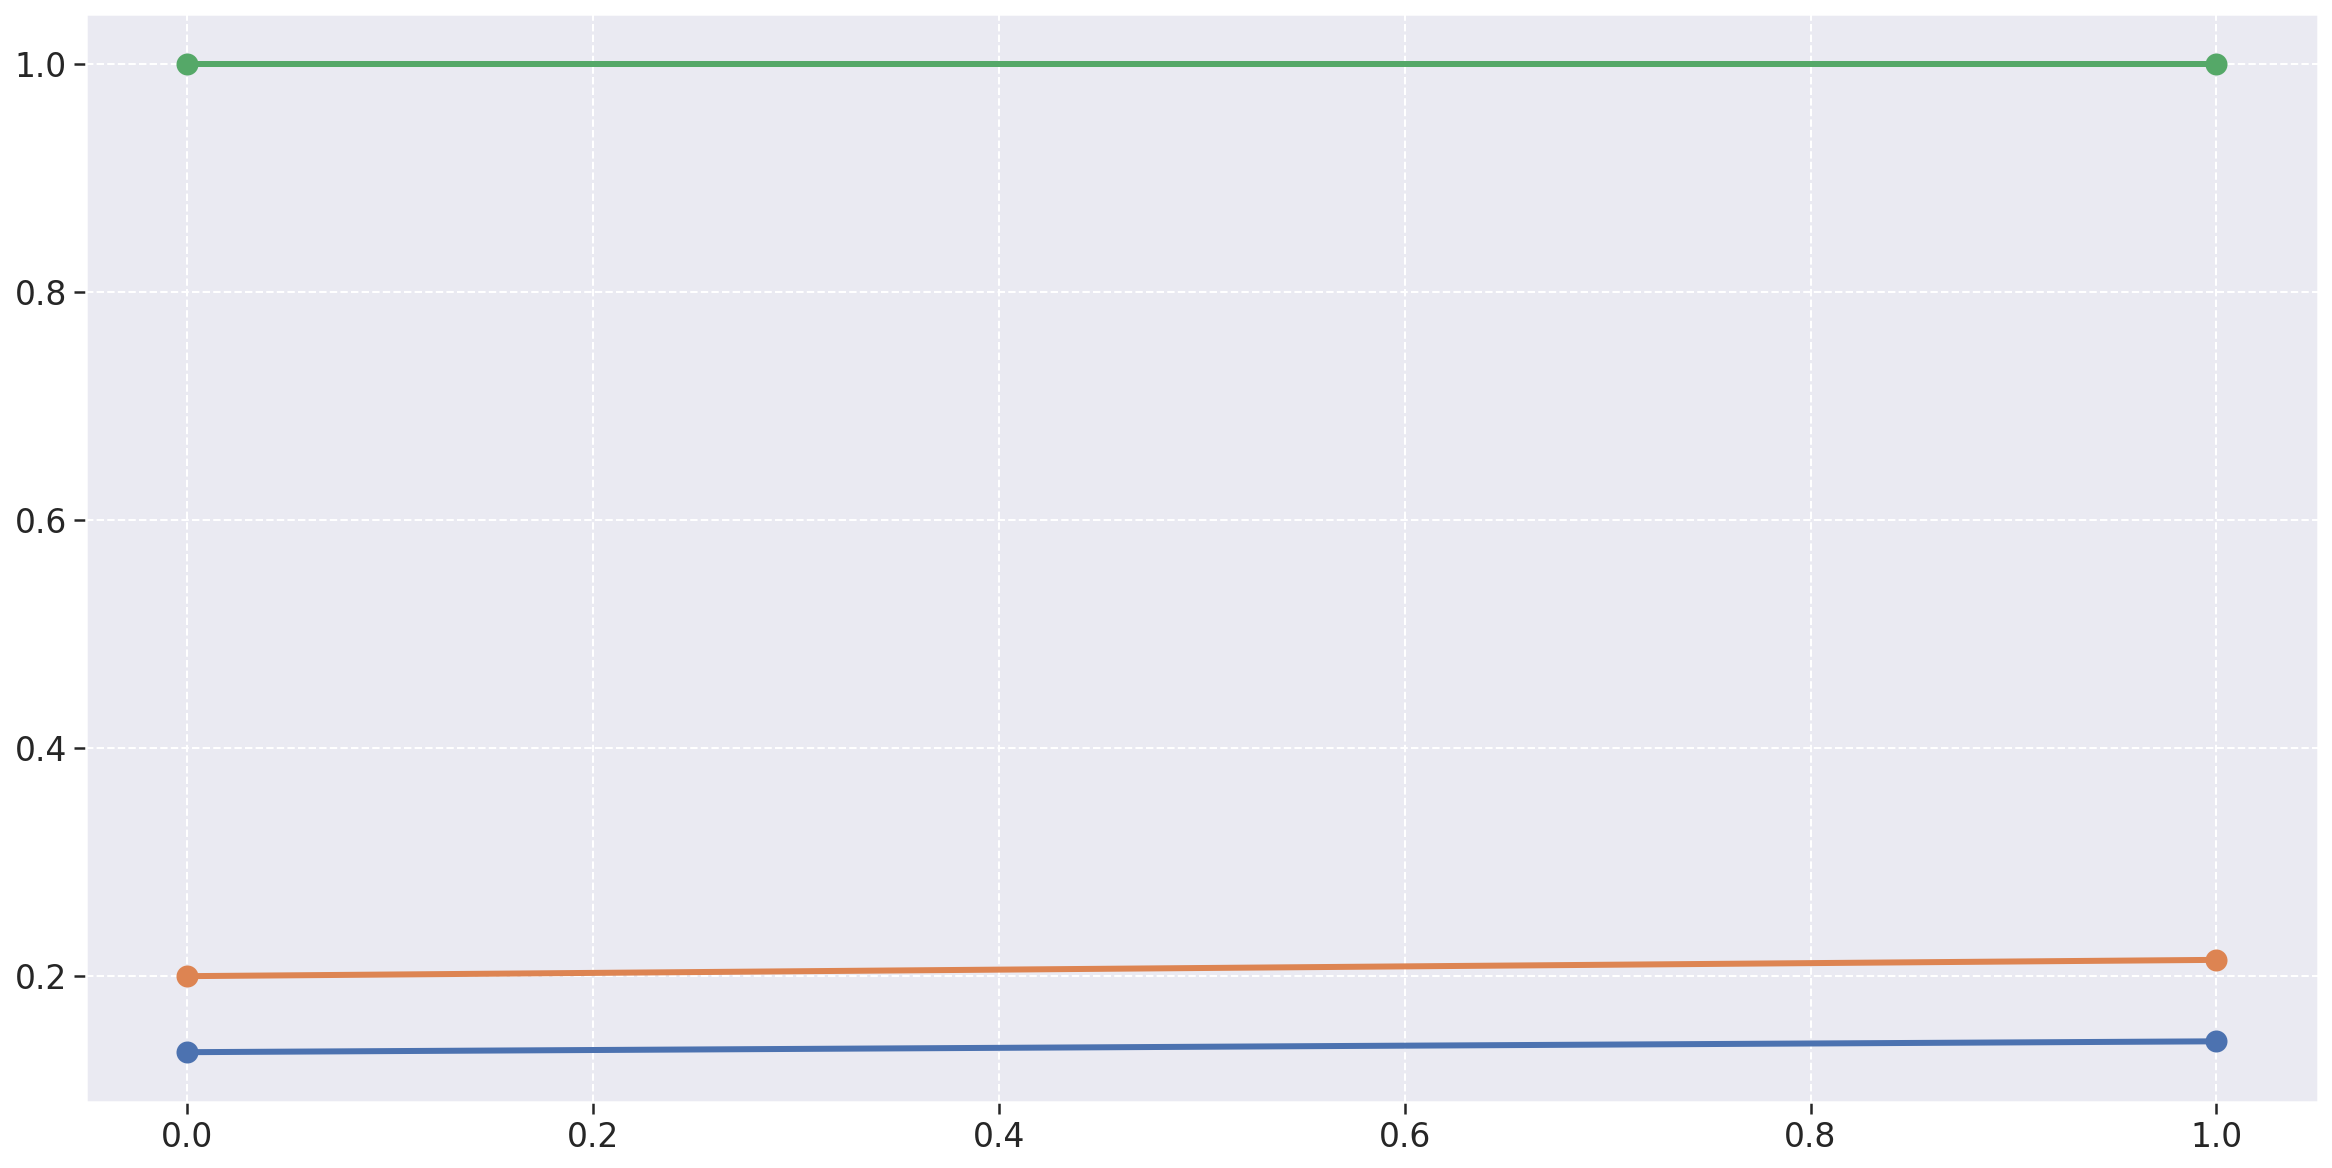

In [32]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(archives_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(archives_metrics['m3'], linewidth=3, marker='o', markersize=10)

# Profile

## M1

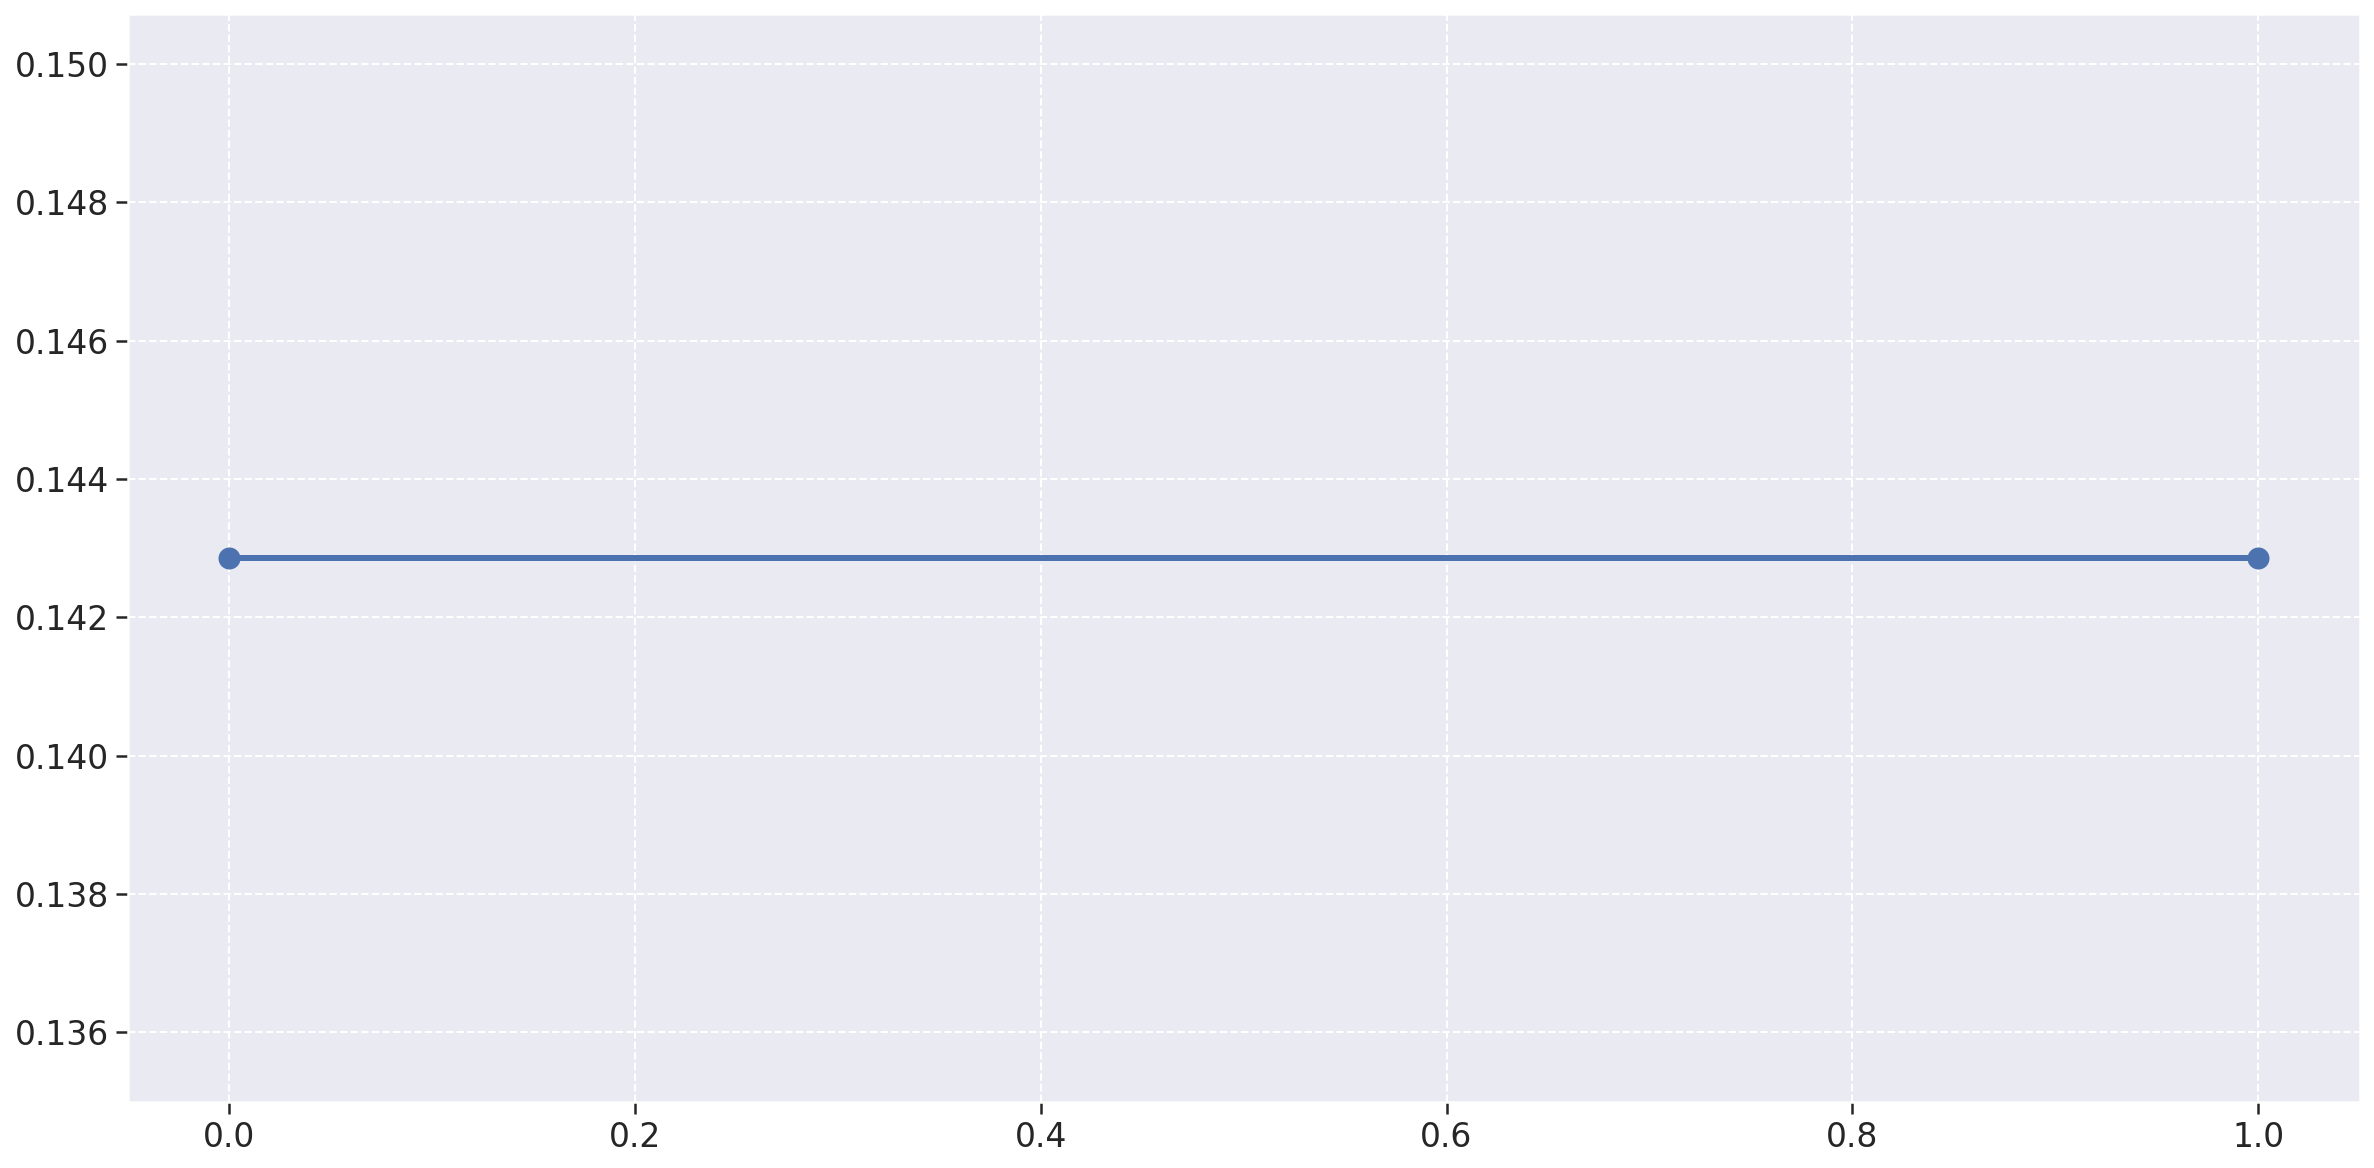

In [33]:
fig = plt.figure(figsize=(20, 10))

plt.plot(profile_metrics['m1'], linewidth=3, marker='o', markersize=10)

## M2

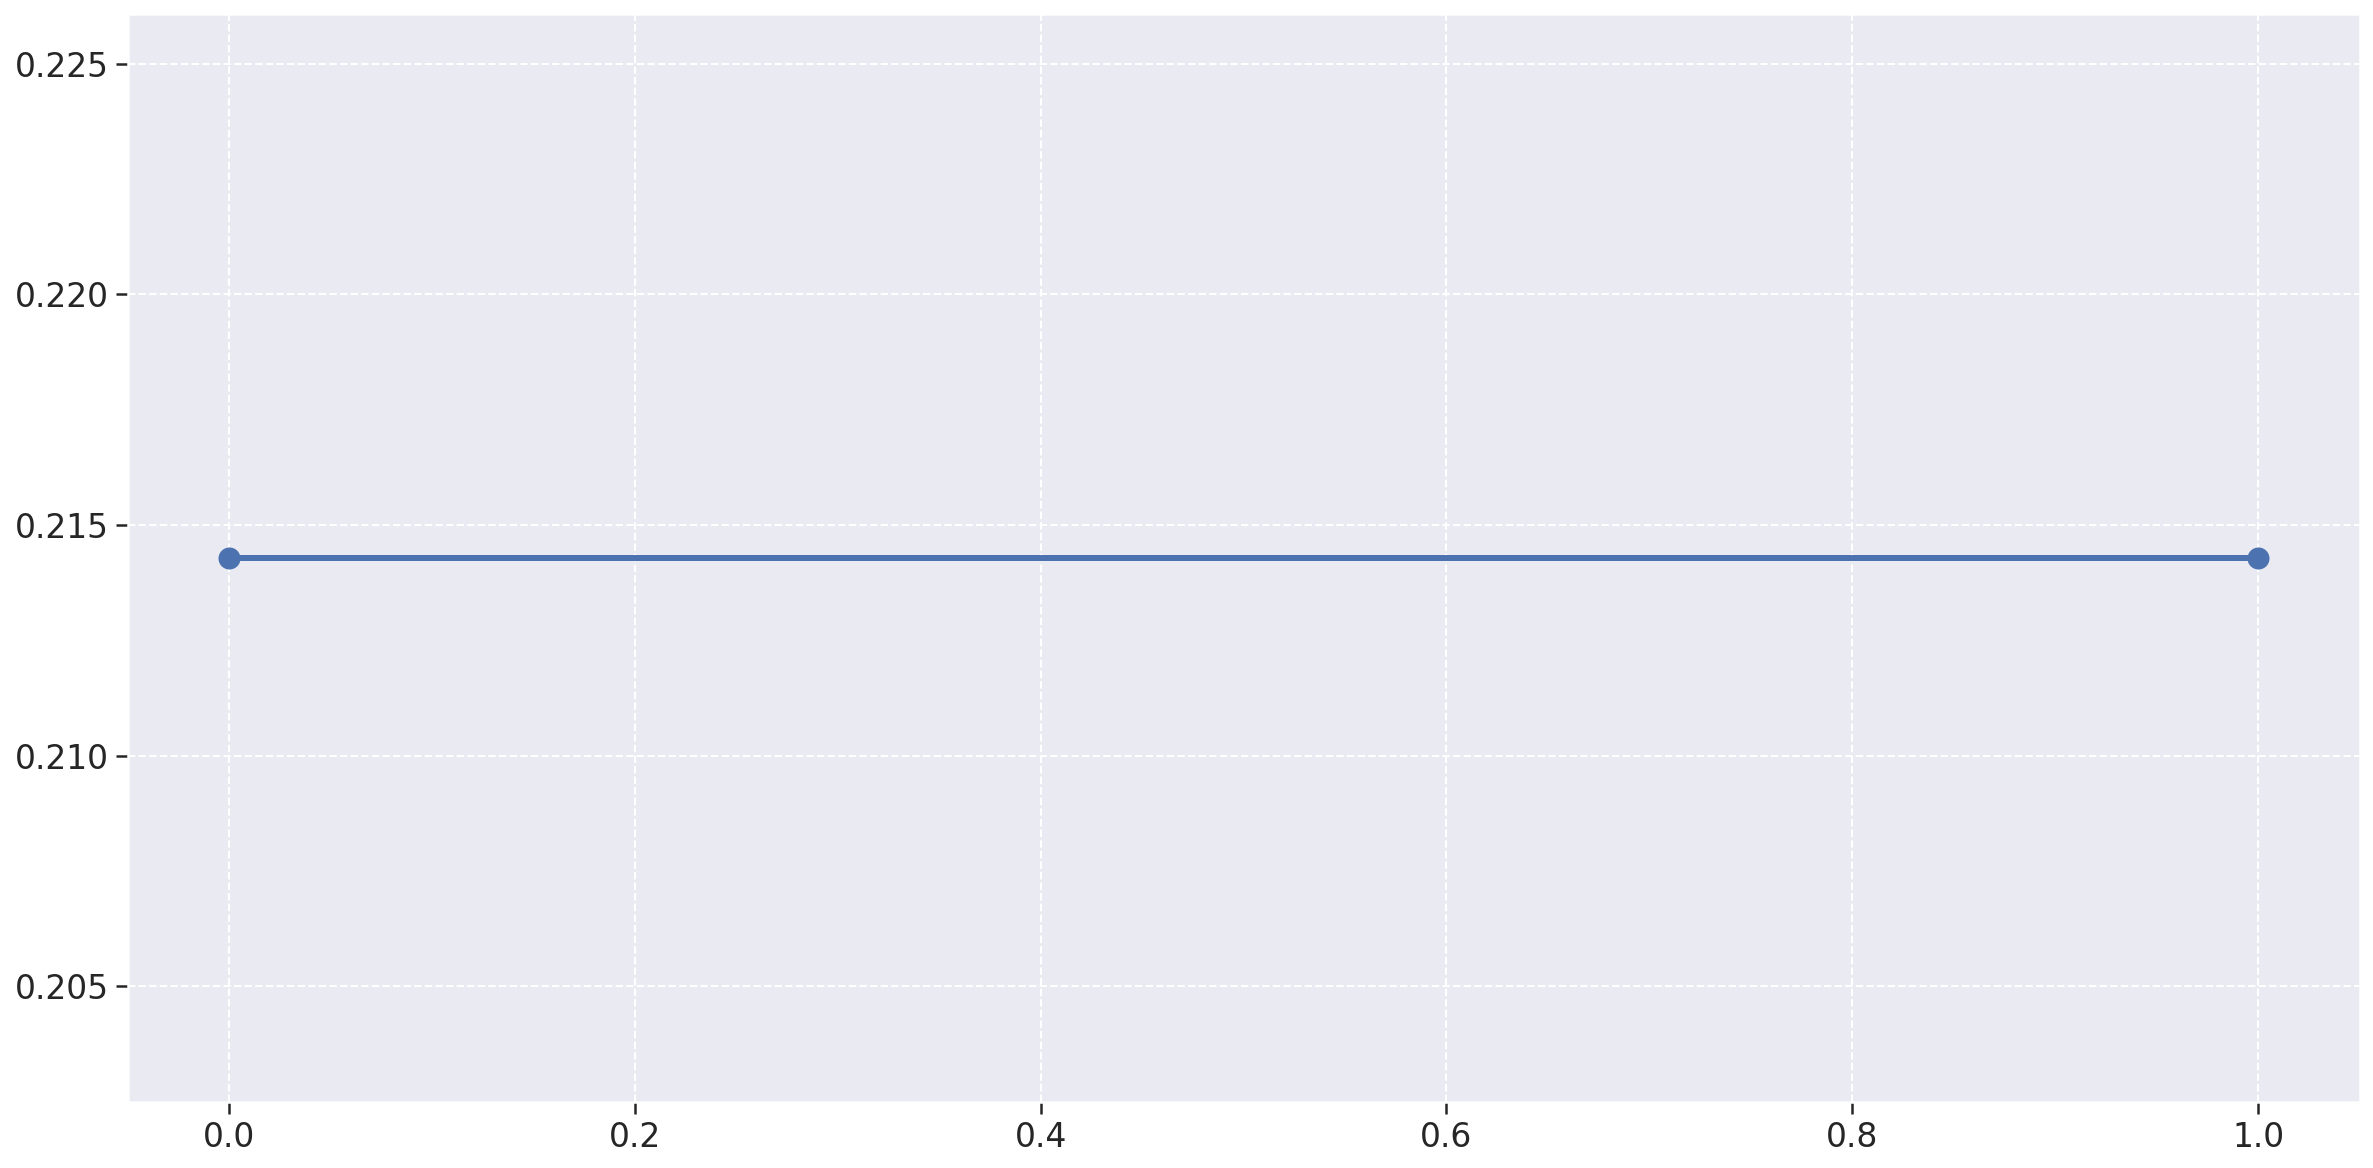

In [34]:
fig = plt.figure(figsize=(20, 10))

plt.plot(profile_metrics['m2'], linewidth=3, marker='o', markersize=10)

## M3

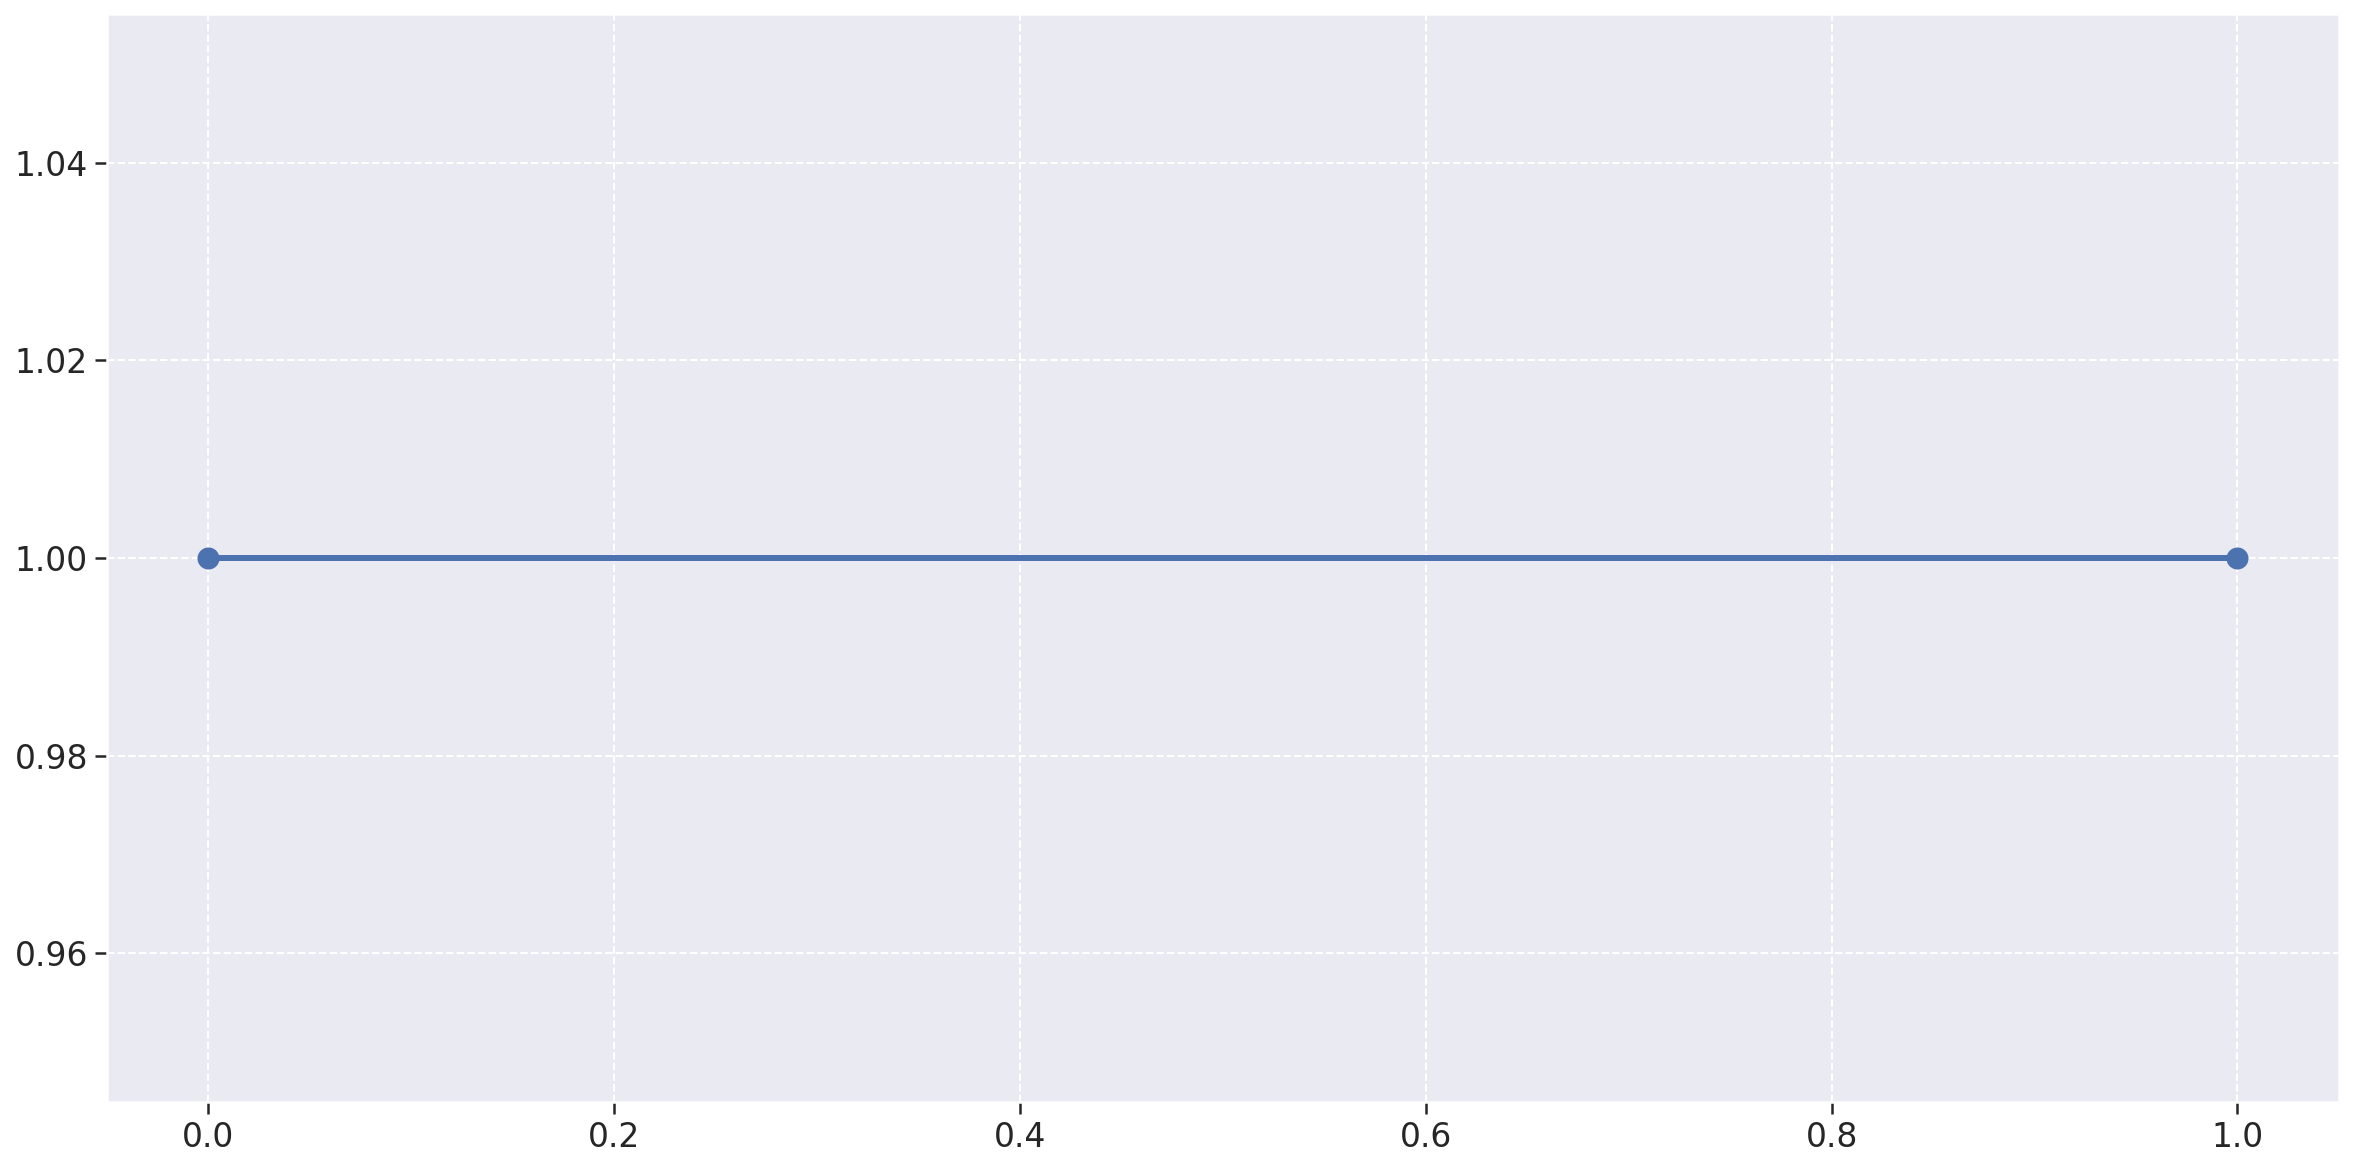

In [35]:
fig = plt.figure(figsize=(20, 10))

plt.plot(profile_metrics['m3'], linewidth=3, marker='o', markersize=10)

## TOTAL

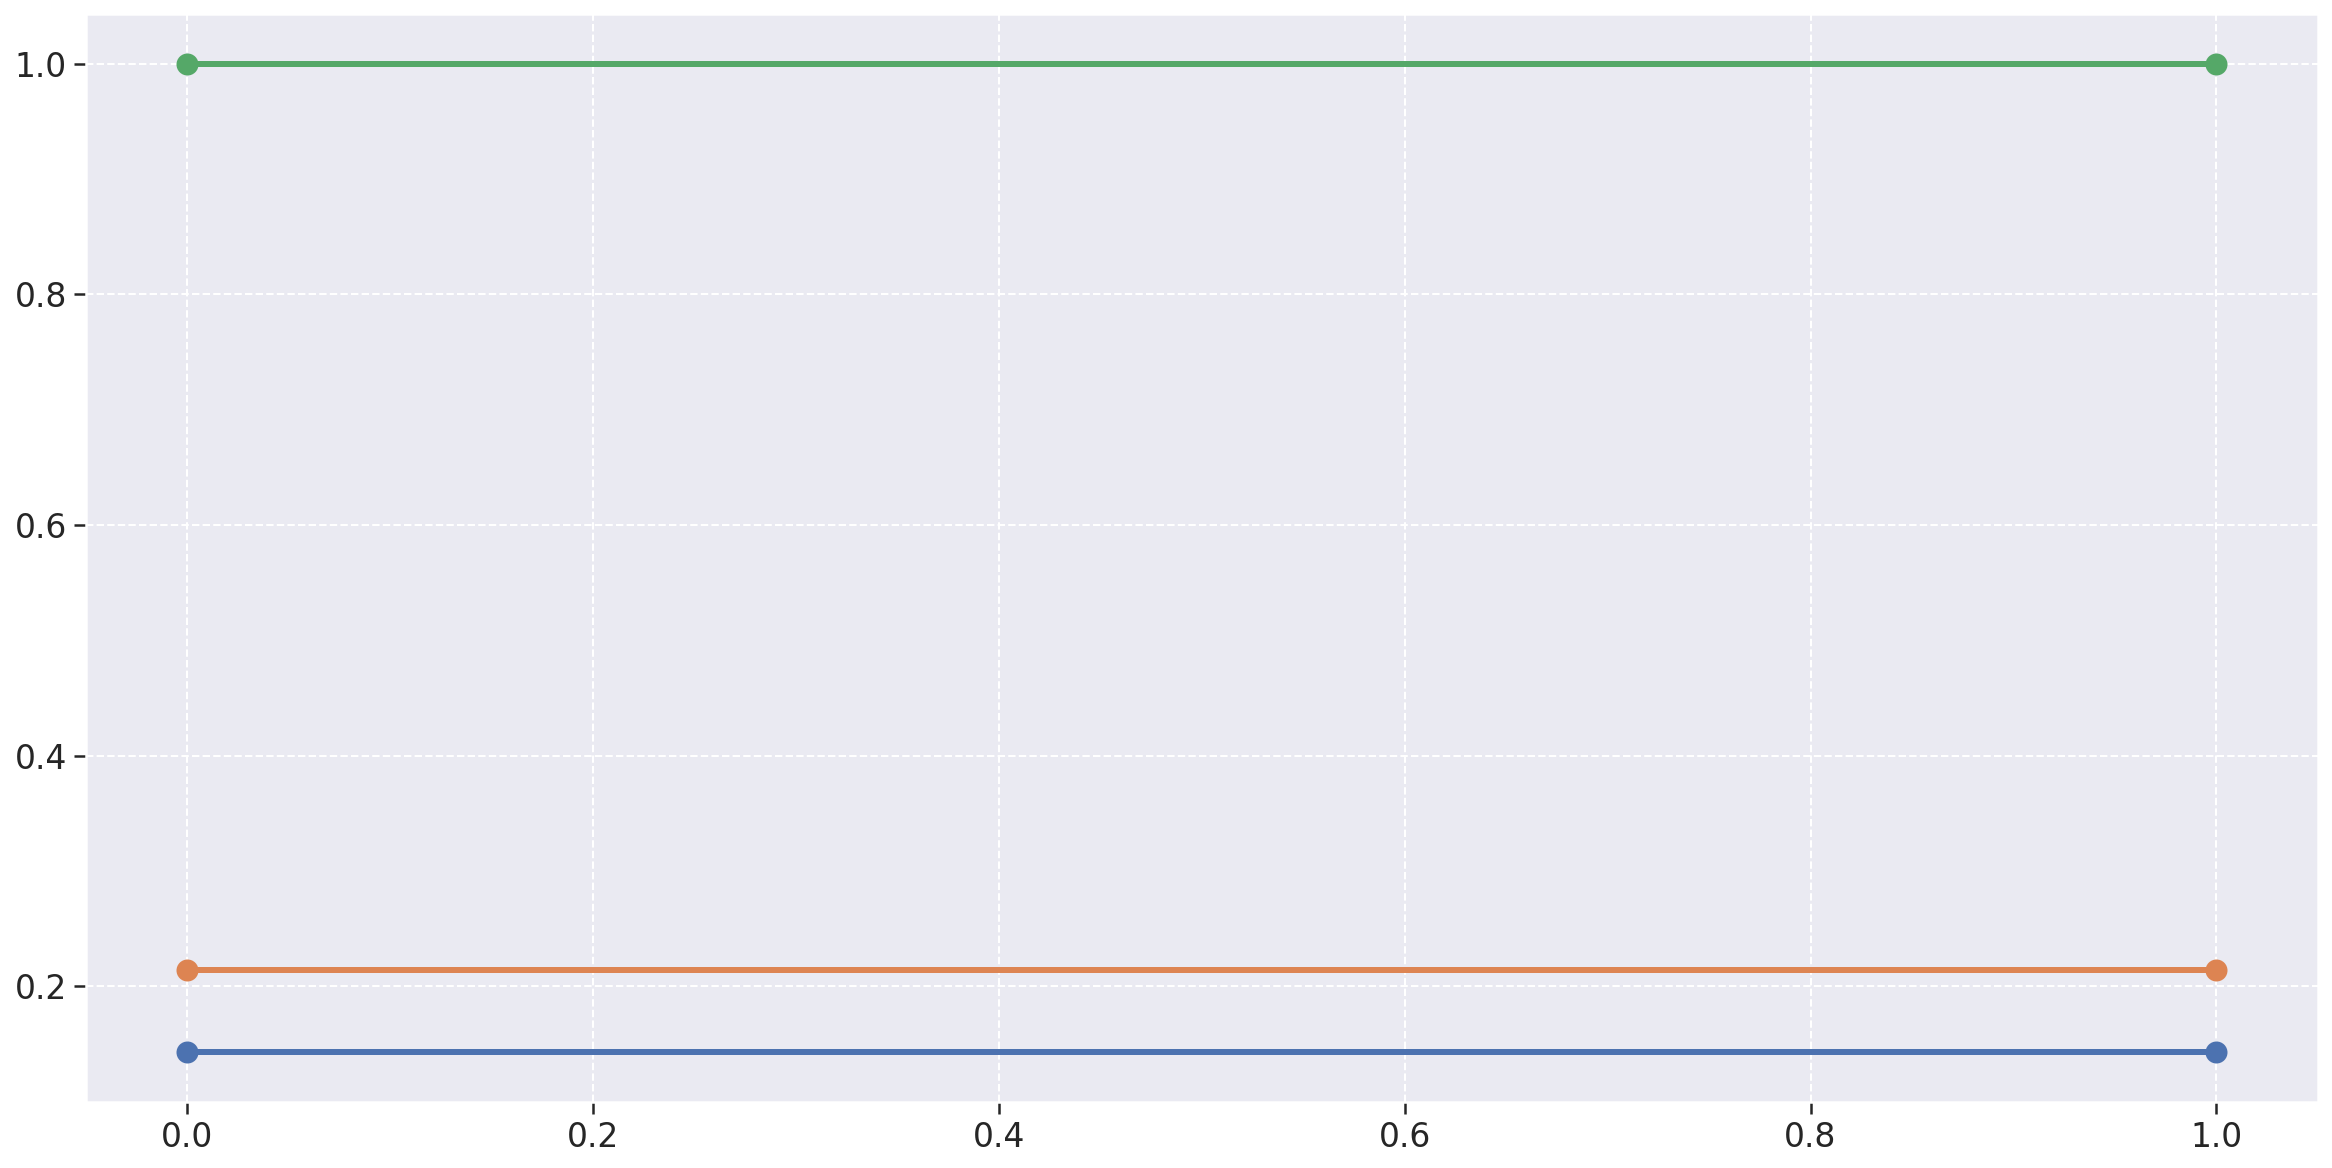

In [36]:
fig = plt.figure(figsize=(20, 10))

plt.plot(profile_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(profile_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(profile_metrics['m3'], linewidth=3, marker='o', markersize=10)

# Frontend

## M1

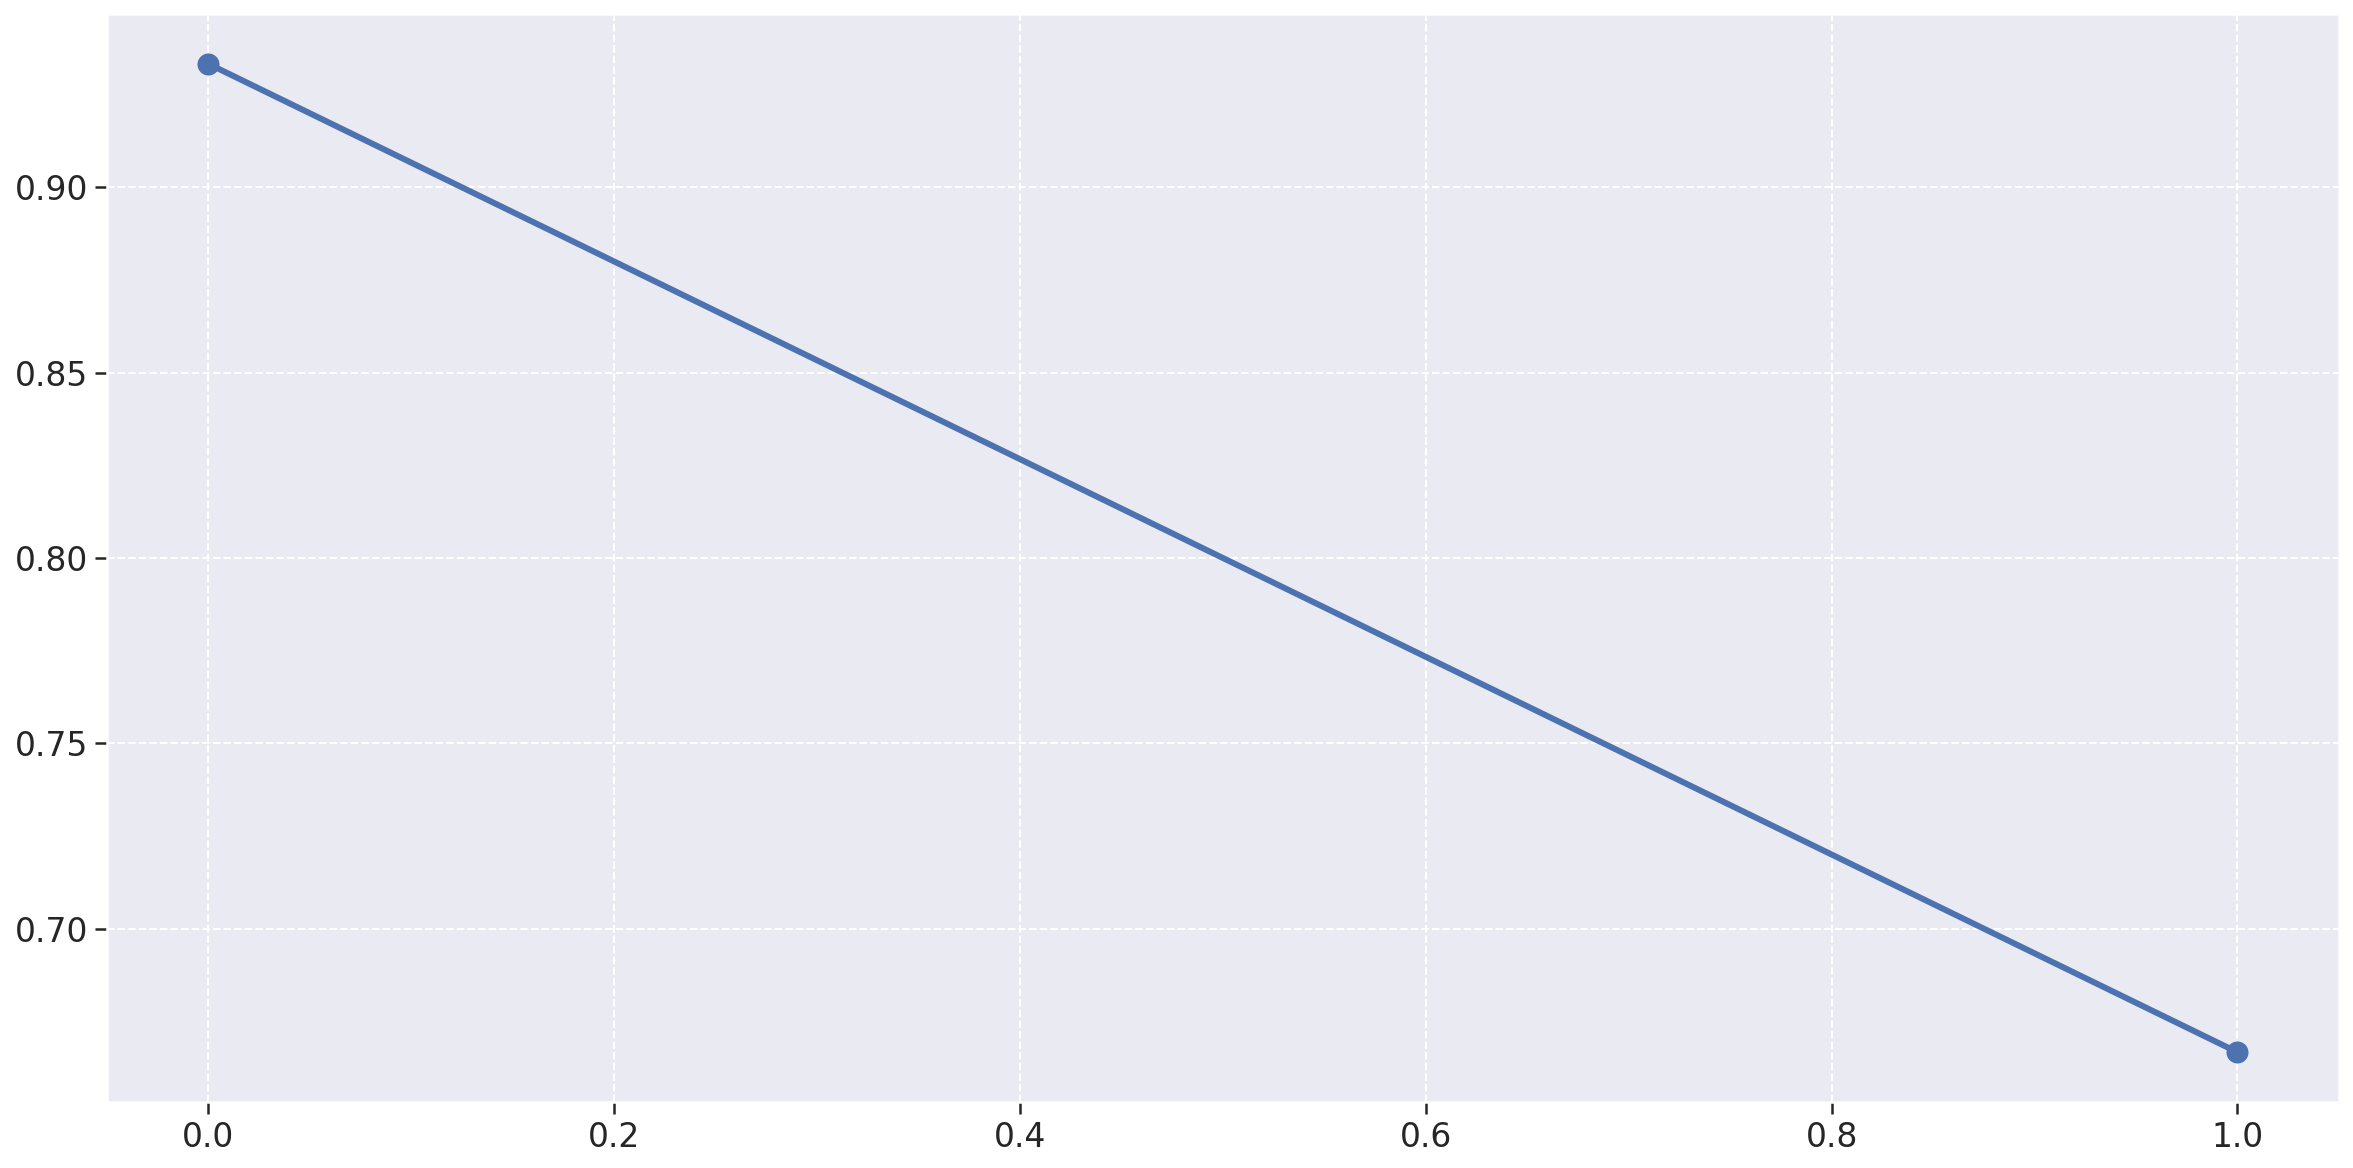

In [37]:
fig = plt.figure(figsize=(20, 10))

plt.plot(frontend_metrics['m1'], linewidth=3, marker='o', markersize=10)

## M2

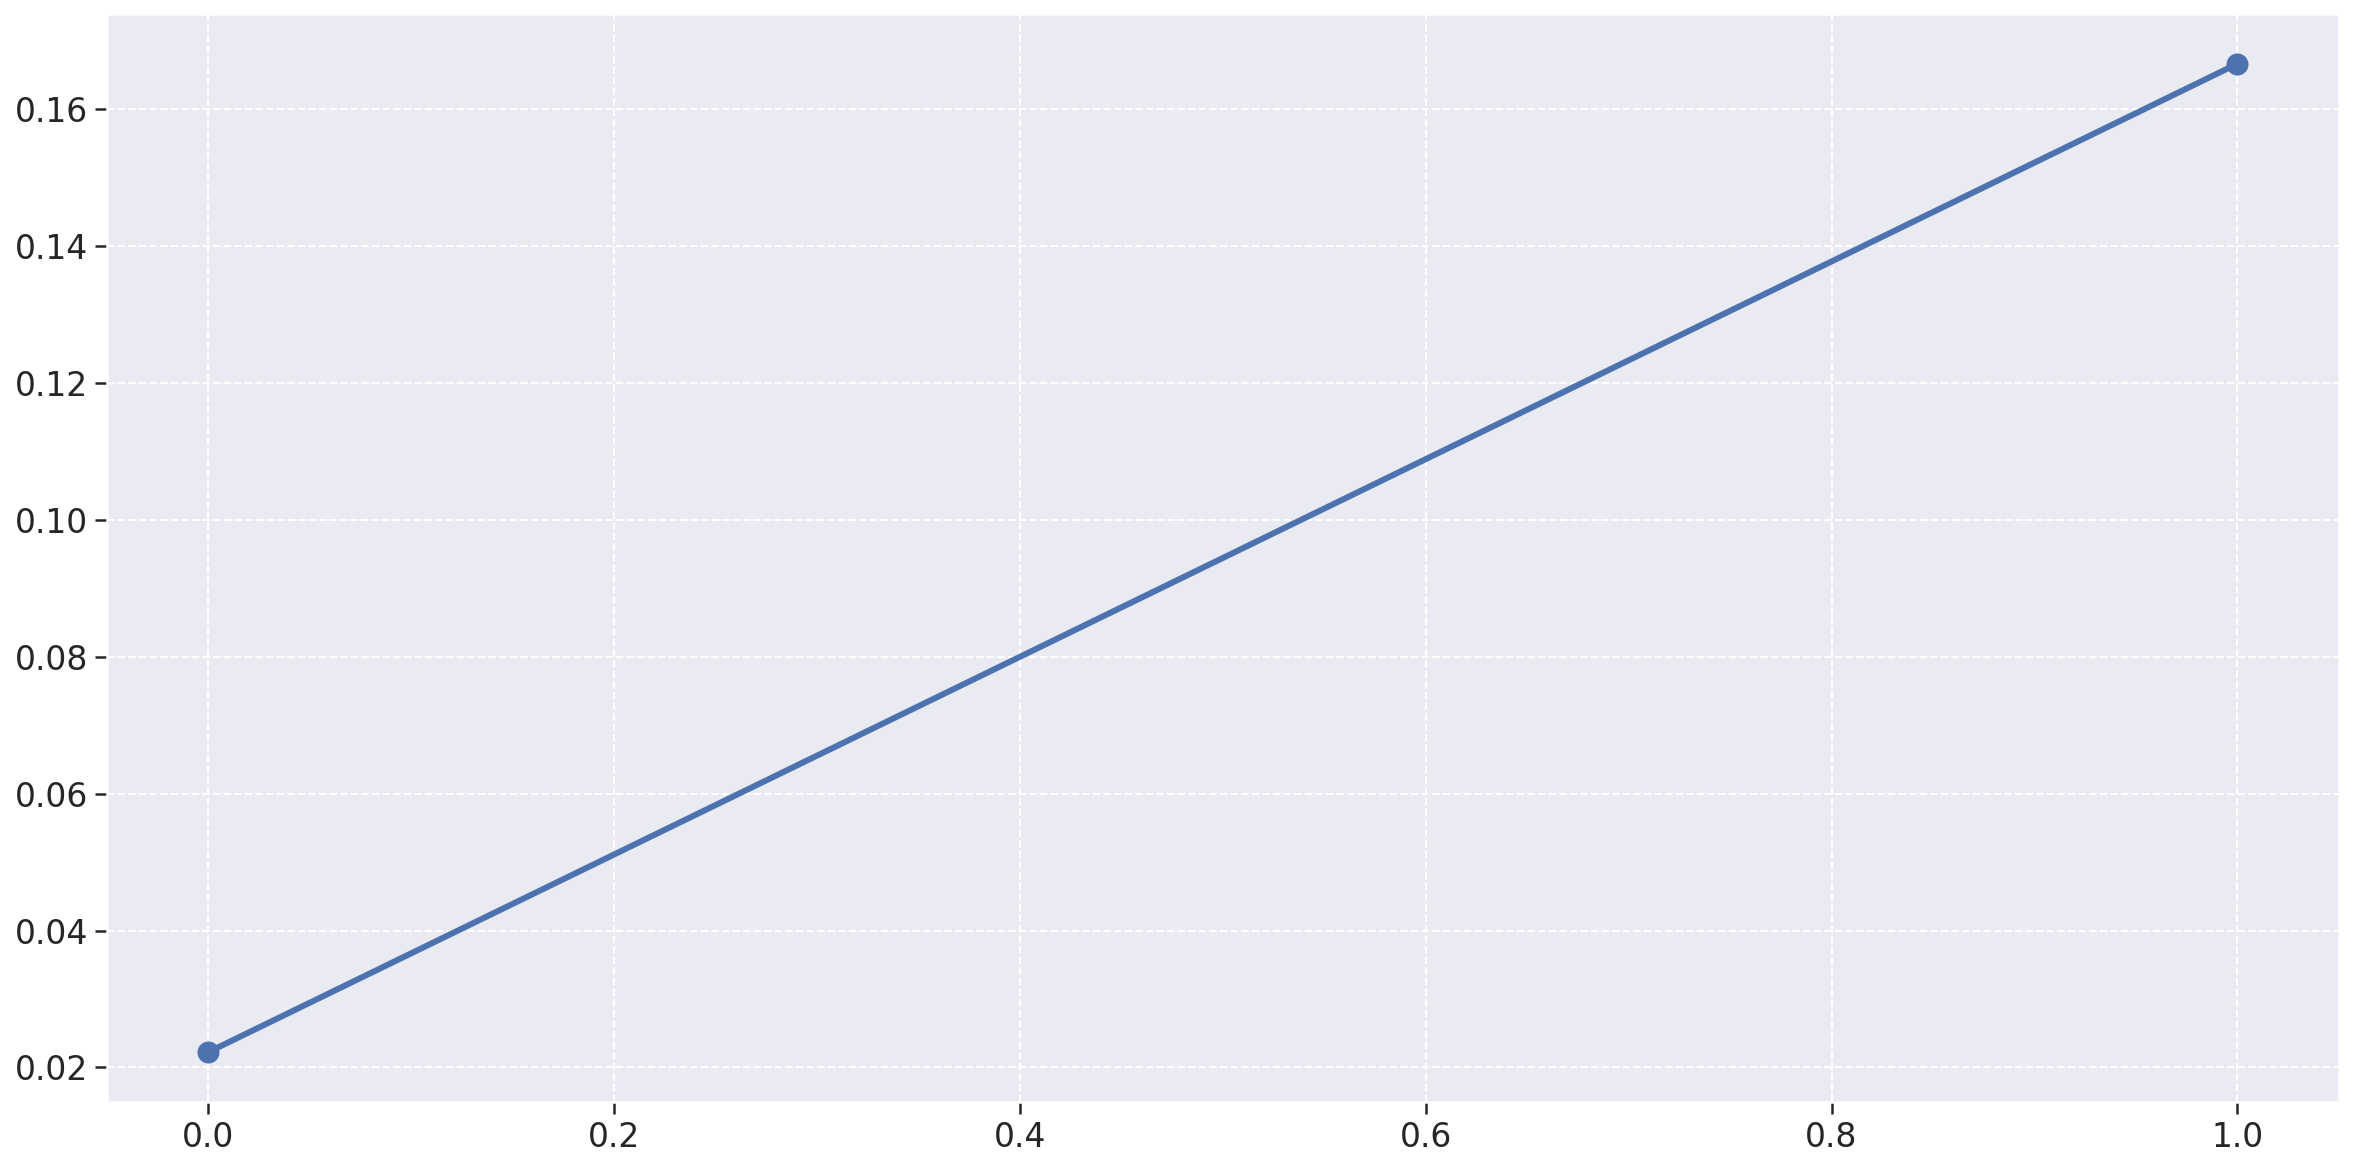

In [95]:
fig = plt.figure(figsize=(20, 10))

plt.plot(frontend_metrics['m2'], linewidth=3, marker='o', markersize=10)

## M3

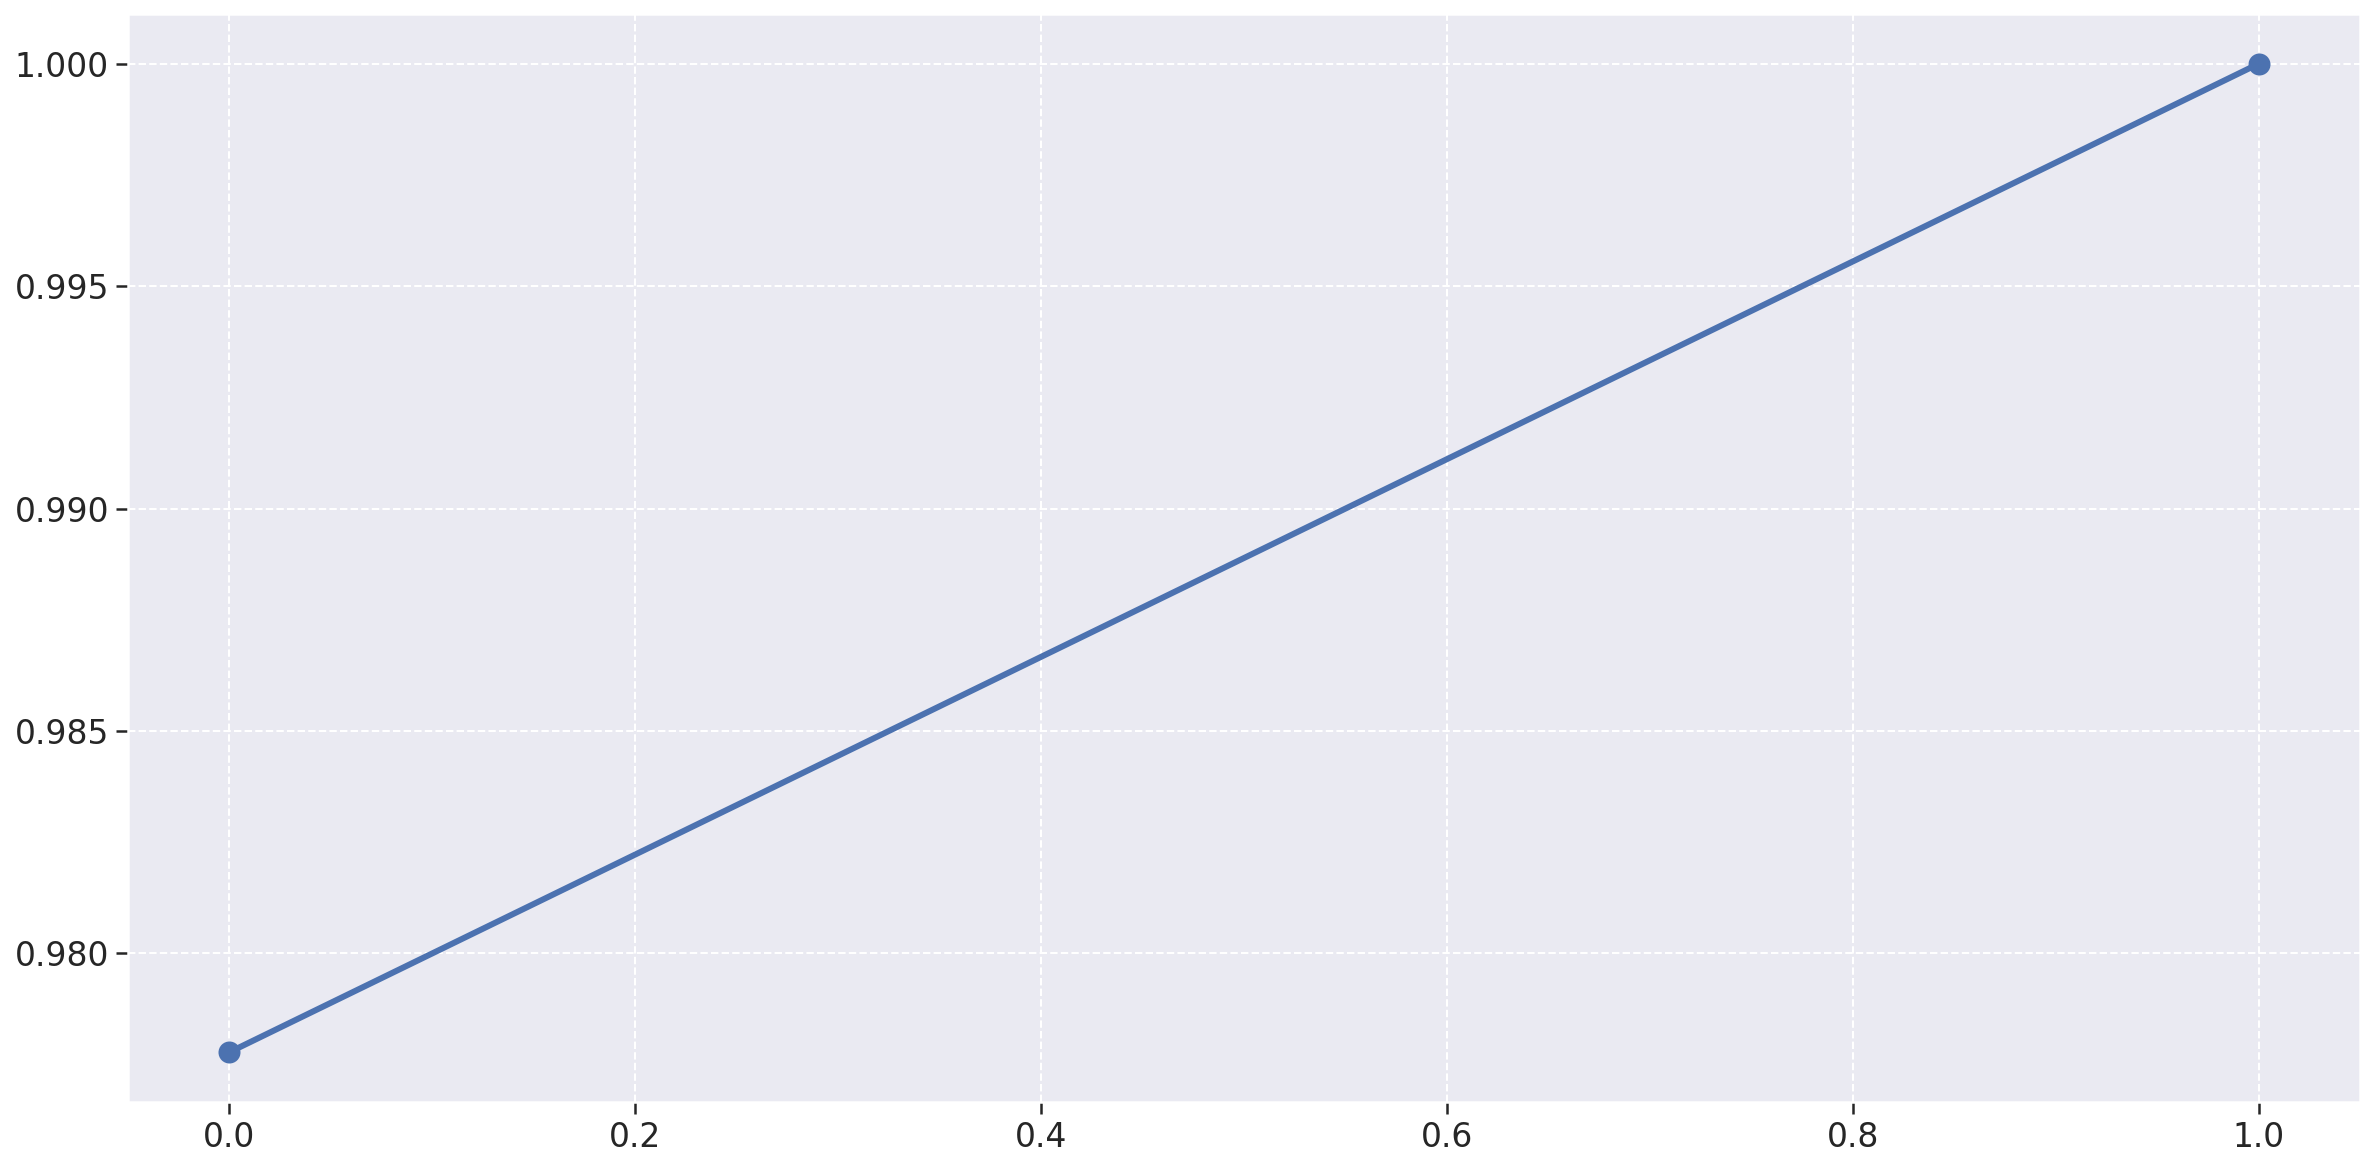

In [91]:
fig = plt.figure(figsize=(20, 10))

plt.plot(frontend_metrics['m3'], linewidth=3, marker='o', markersize=10)

## TOTAL

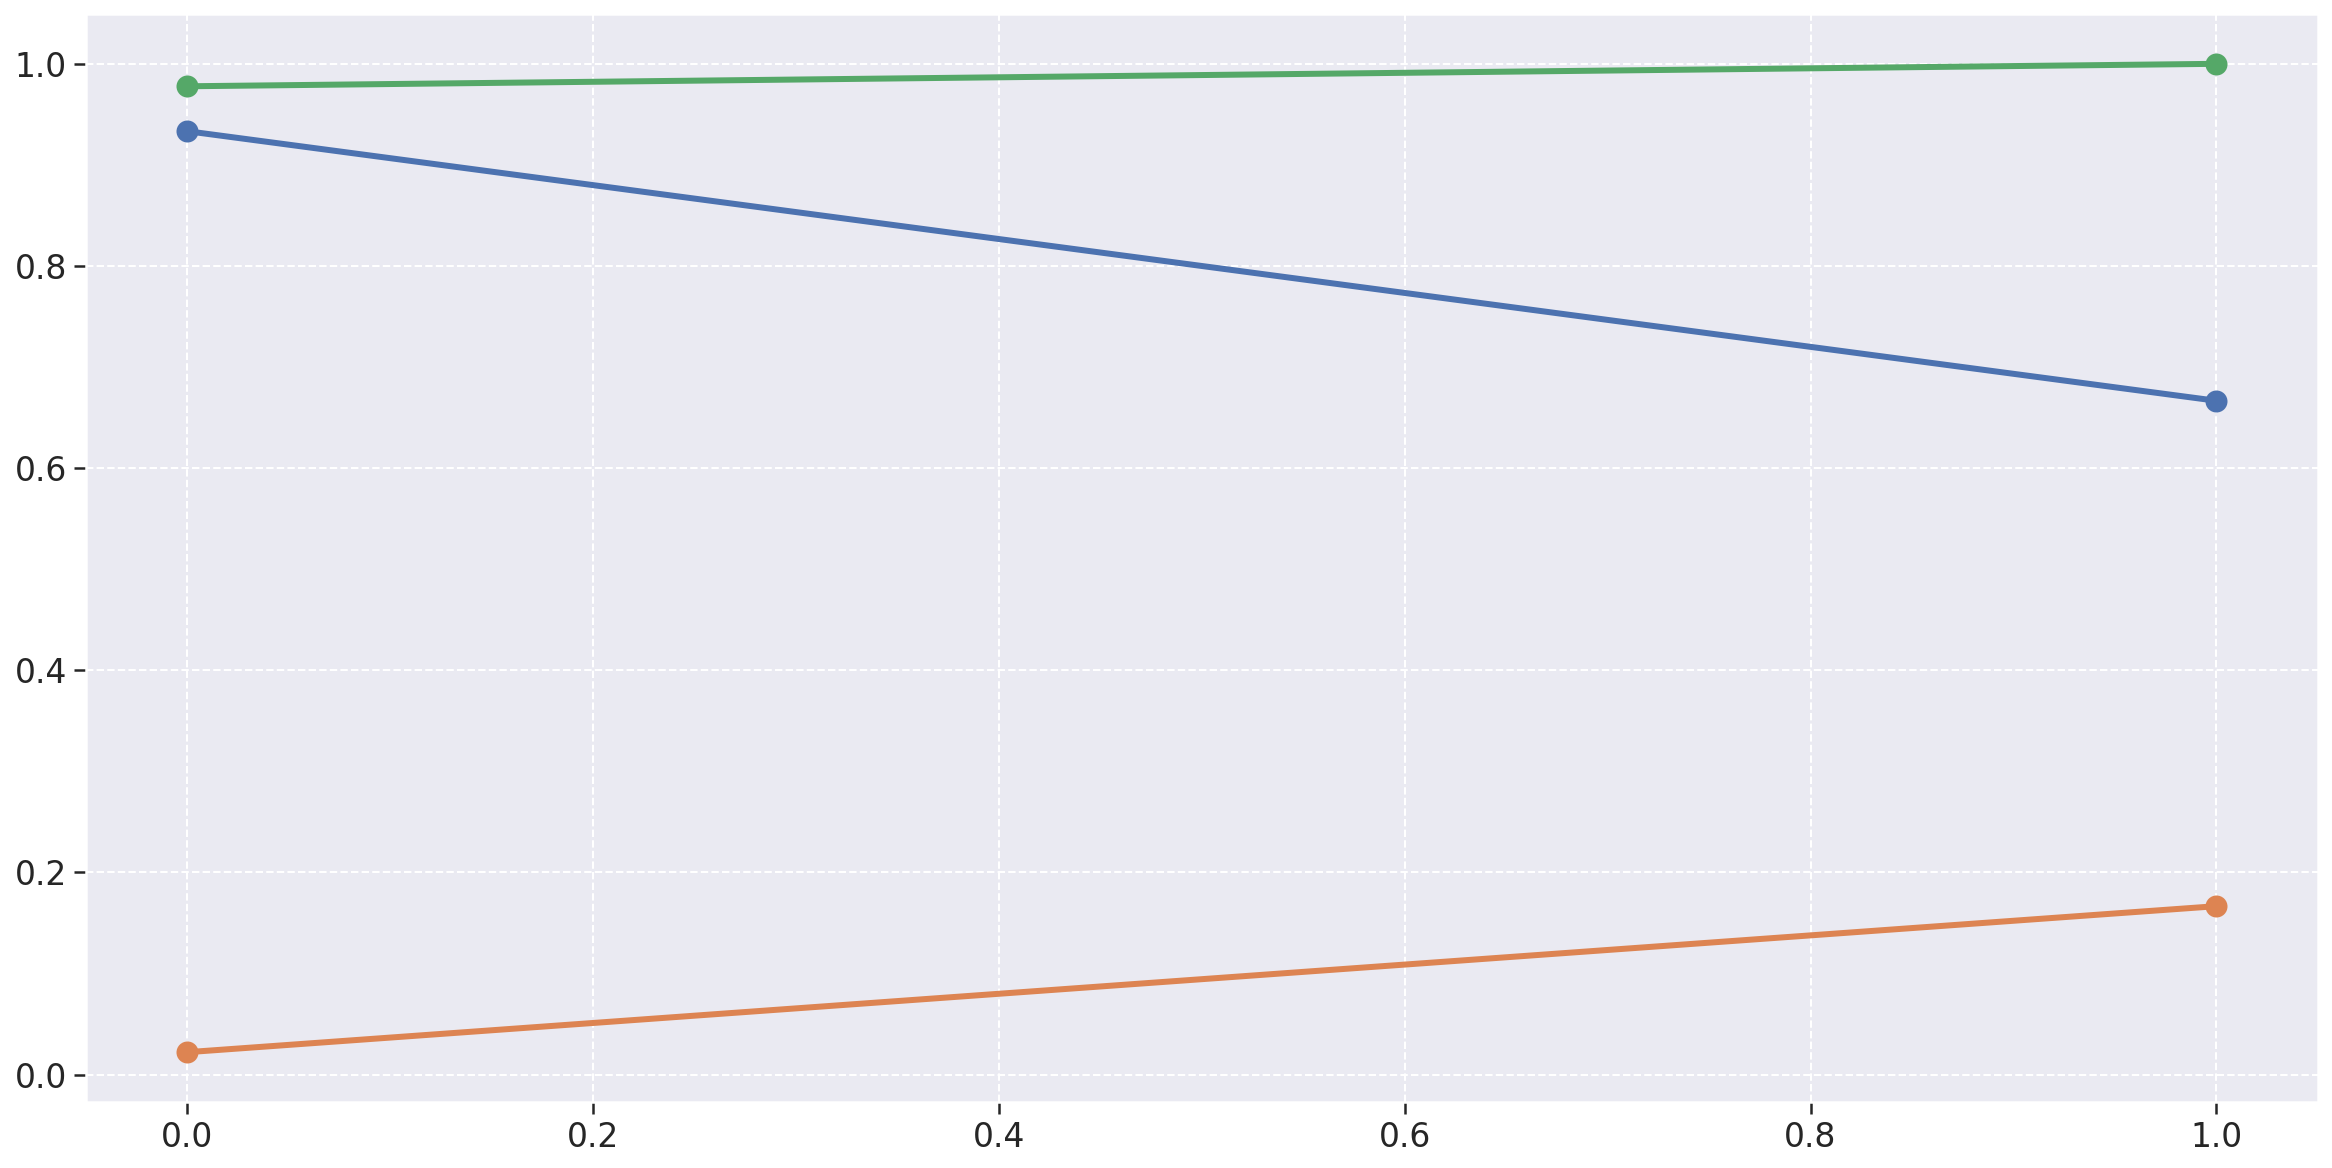

In [98]:
fig = plt.figure(figsize=(20, 10))

plt.plot(frontend_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(frontend_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(frontend_metrics['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [42]:
psc1 = 1
pc = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

archives_metrics['code_quality'] = ((archives_metrics['m1']*pm1)+(archives_metrics['m2']*pm2)+(archives_metrics['m3']*pm3))*psc1
profile_metrics['code_quality'] = ((profile_metrics['m1']*pm1)+(profile_metrics['m2']*pm2)+(profile_metrics['m3']*pm3))*psc1
frontend_metrics['code_quality'] = ((frontend_metrics['m1']*pm1)+(frontend_metrics['m2']*pm2)+(frontend_metrics['m3']*pm3))*psc1

## Code Quality 

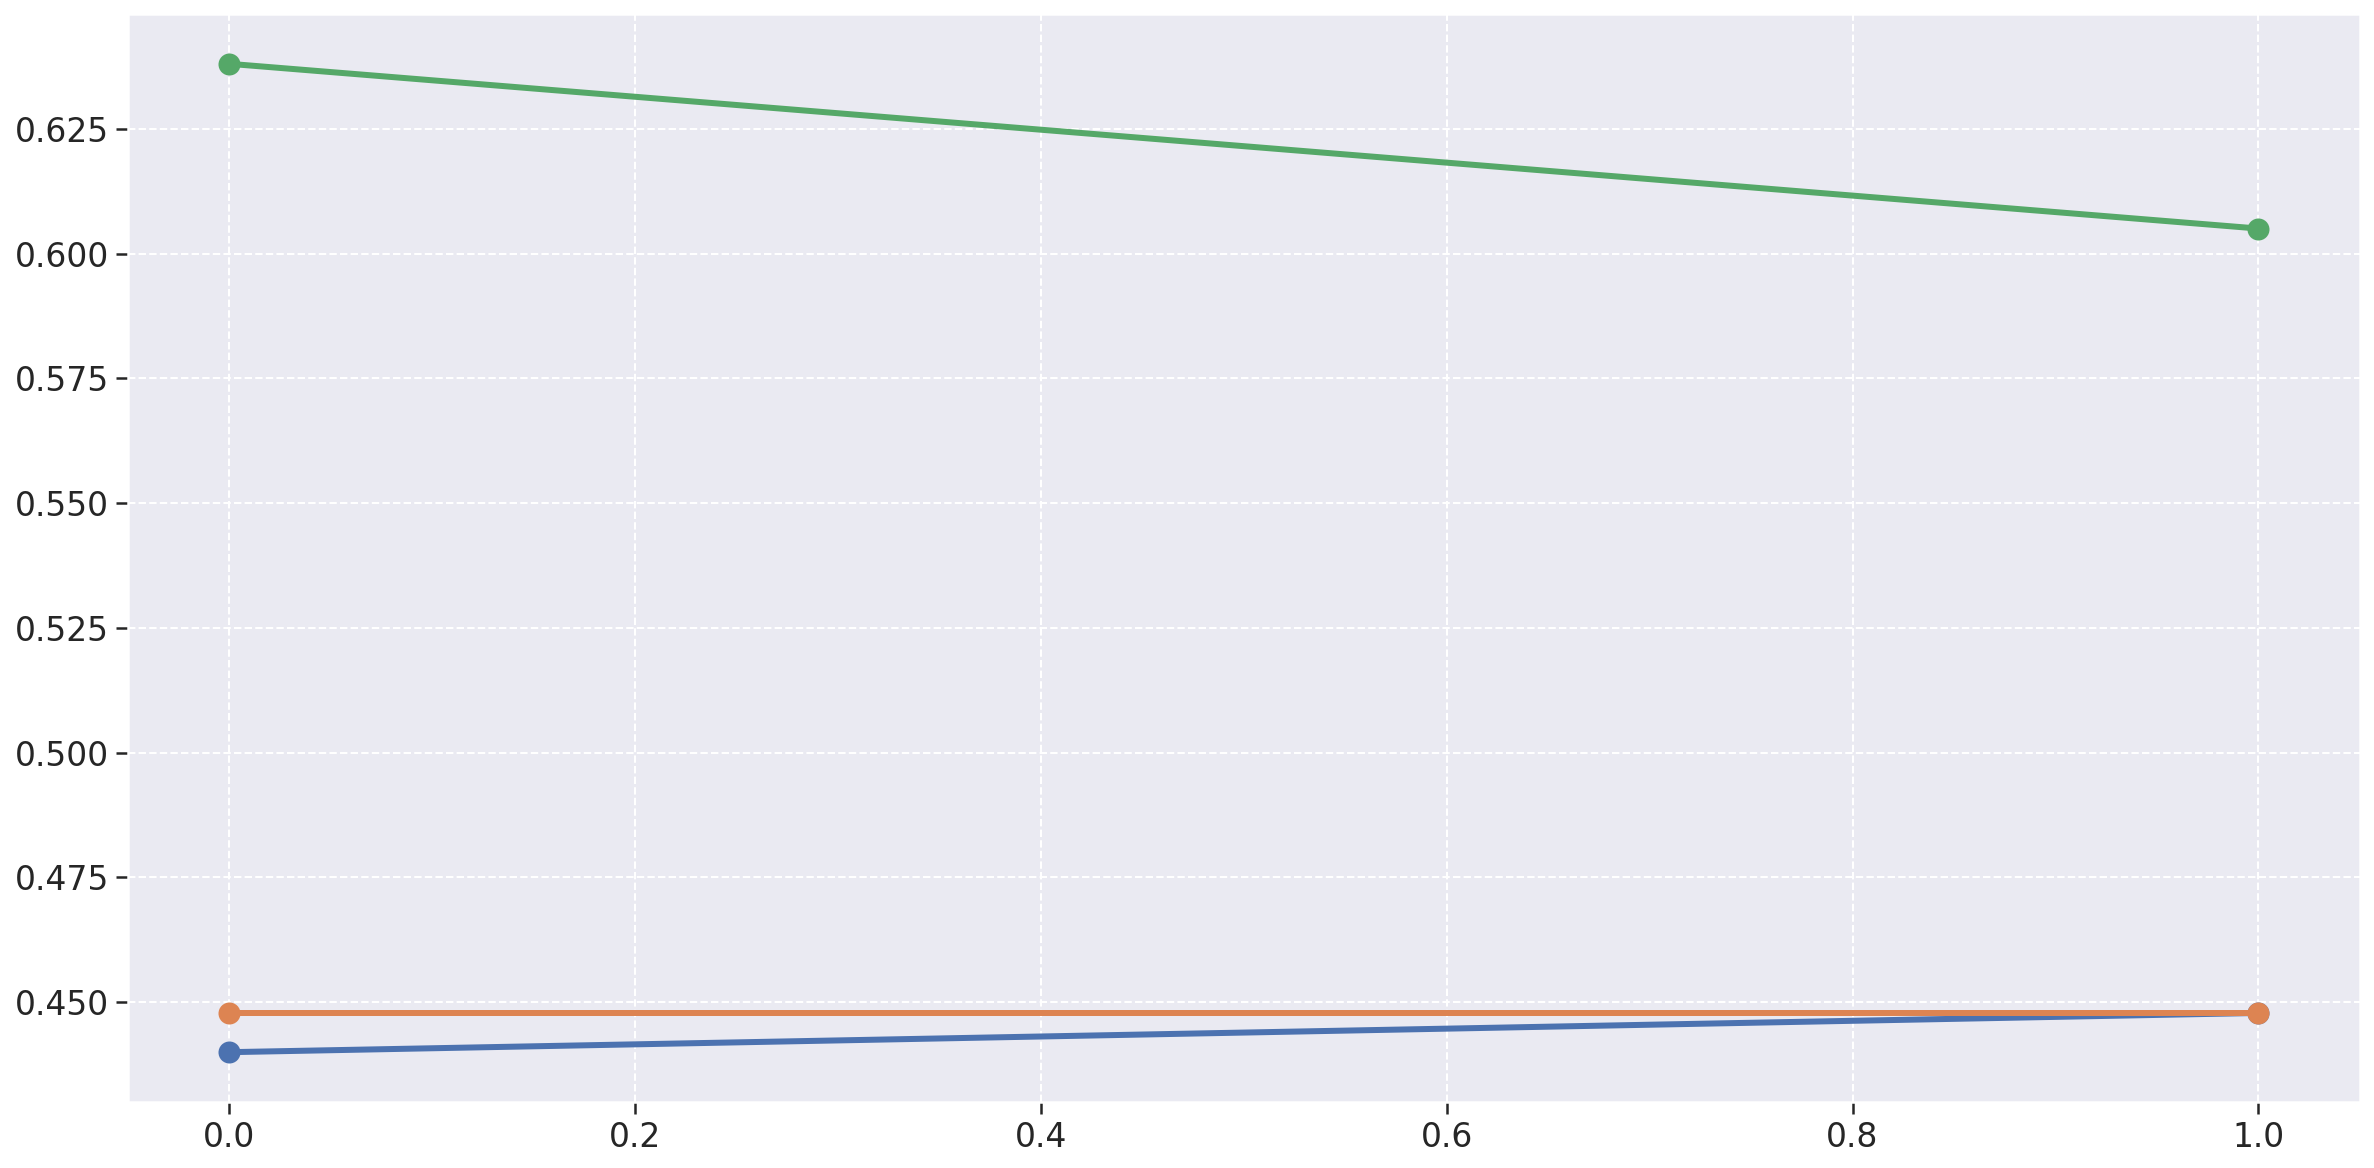

In [44]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(profile_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(frontend_metrics['code_quality'], linewidth=3, marker='o', markersize=10)

## All Metrics

In [45]:
metrics_df = pd.concat([archives_metrics, profile_metrics, frontend_metrics], ignore_index=True)

metrics_df['maintainability'] = metrics_df['code_quality'] * pc
metrics_df['total'] = metrics_df['maintainability'] * pc

In [46]:
metrics_df

m1        m2        m3 repository           version  code_quality  \
0  0.133333  0.200000  1.000000   Archives  03-10-2021-15-47      0.440000   
1  0.142857  0.214286  1.000000   Archives  13-09-2021-15-00      0.447857   
2  0.142857  0.214286  1.000000    Profile  03-10-2021-15-48      0.447857   
3  0.142857  0.214286  1.000000    Profile  13-09-2021-14-00      0.447857   
4  0.933333  0.022222  0.977778   Frontend  03-10-2021-15-49      0.638000   
5  0.666667  0.166667  1.000000   Frontend  13-09-2021-20-00      0.605000   

   maintainability     total  
0         0.440000  0.440000  
1         0.447857  0.447857  
2         0.447857  0.447857  
3         0.447857  0.447857  
4         0.638000  0.638000  
5         0.605000  0.605000

(0.4, 0.7)

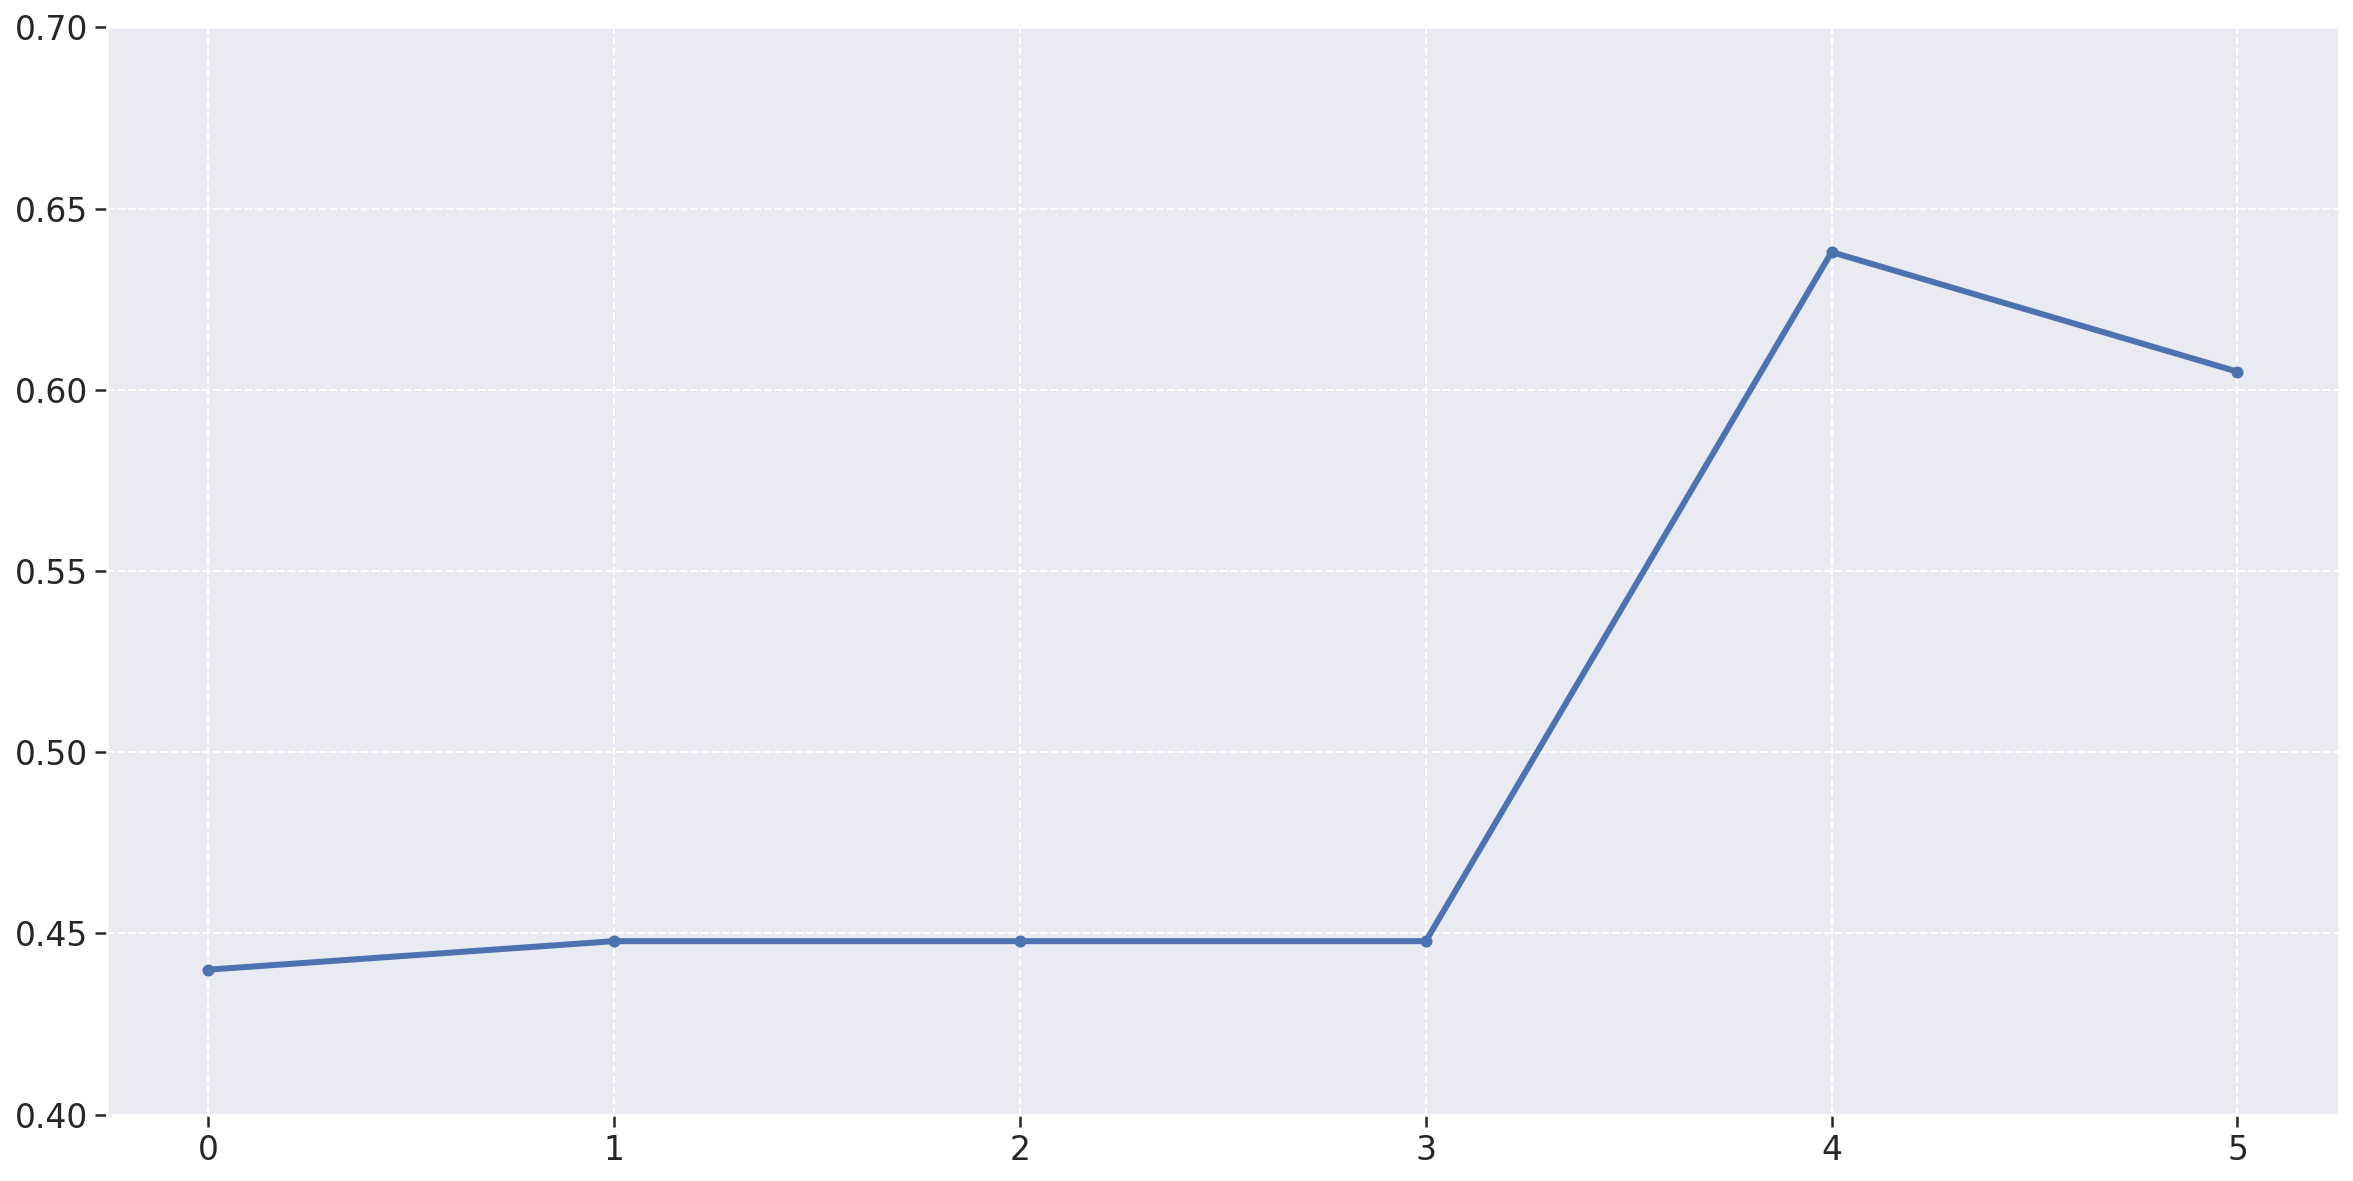

In [53]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['maintainability'], linewidth=3, marker='o', markersize=5)

plt.ylim(.4,.7)

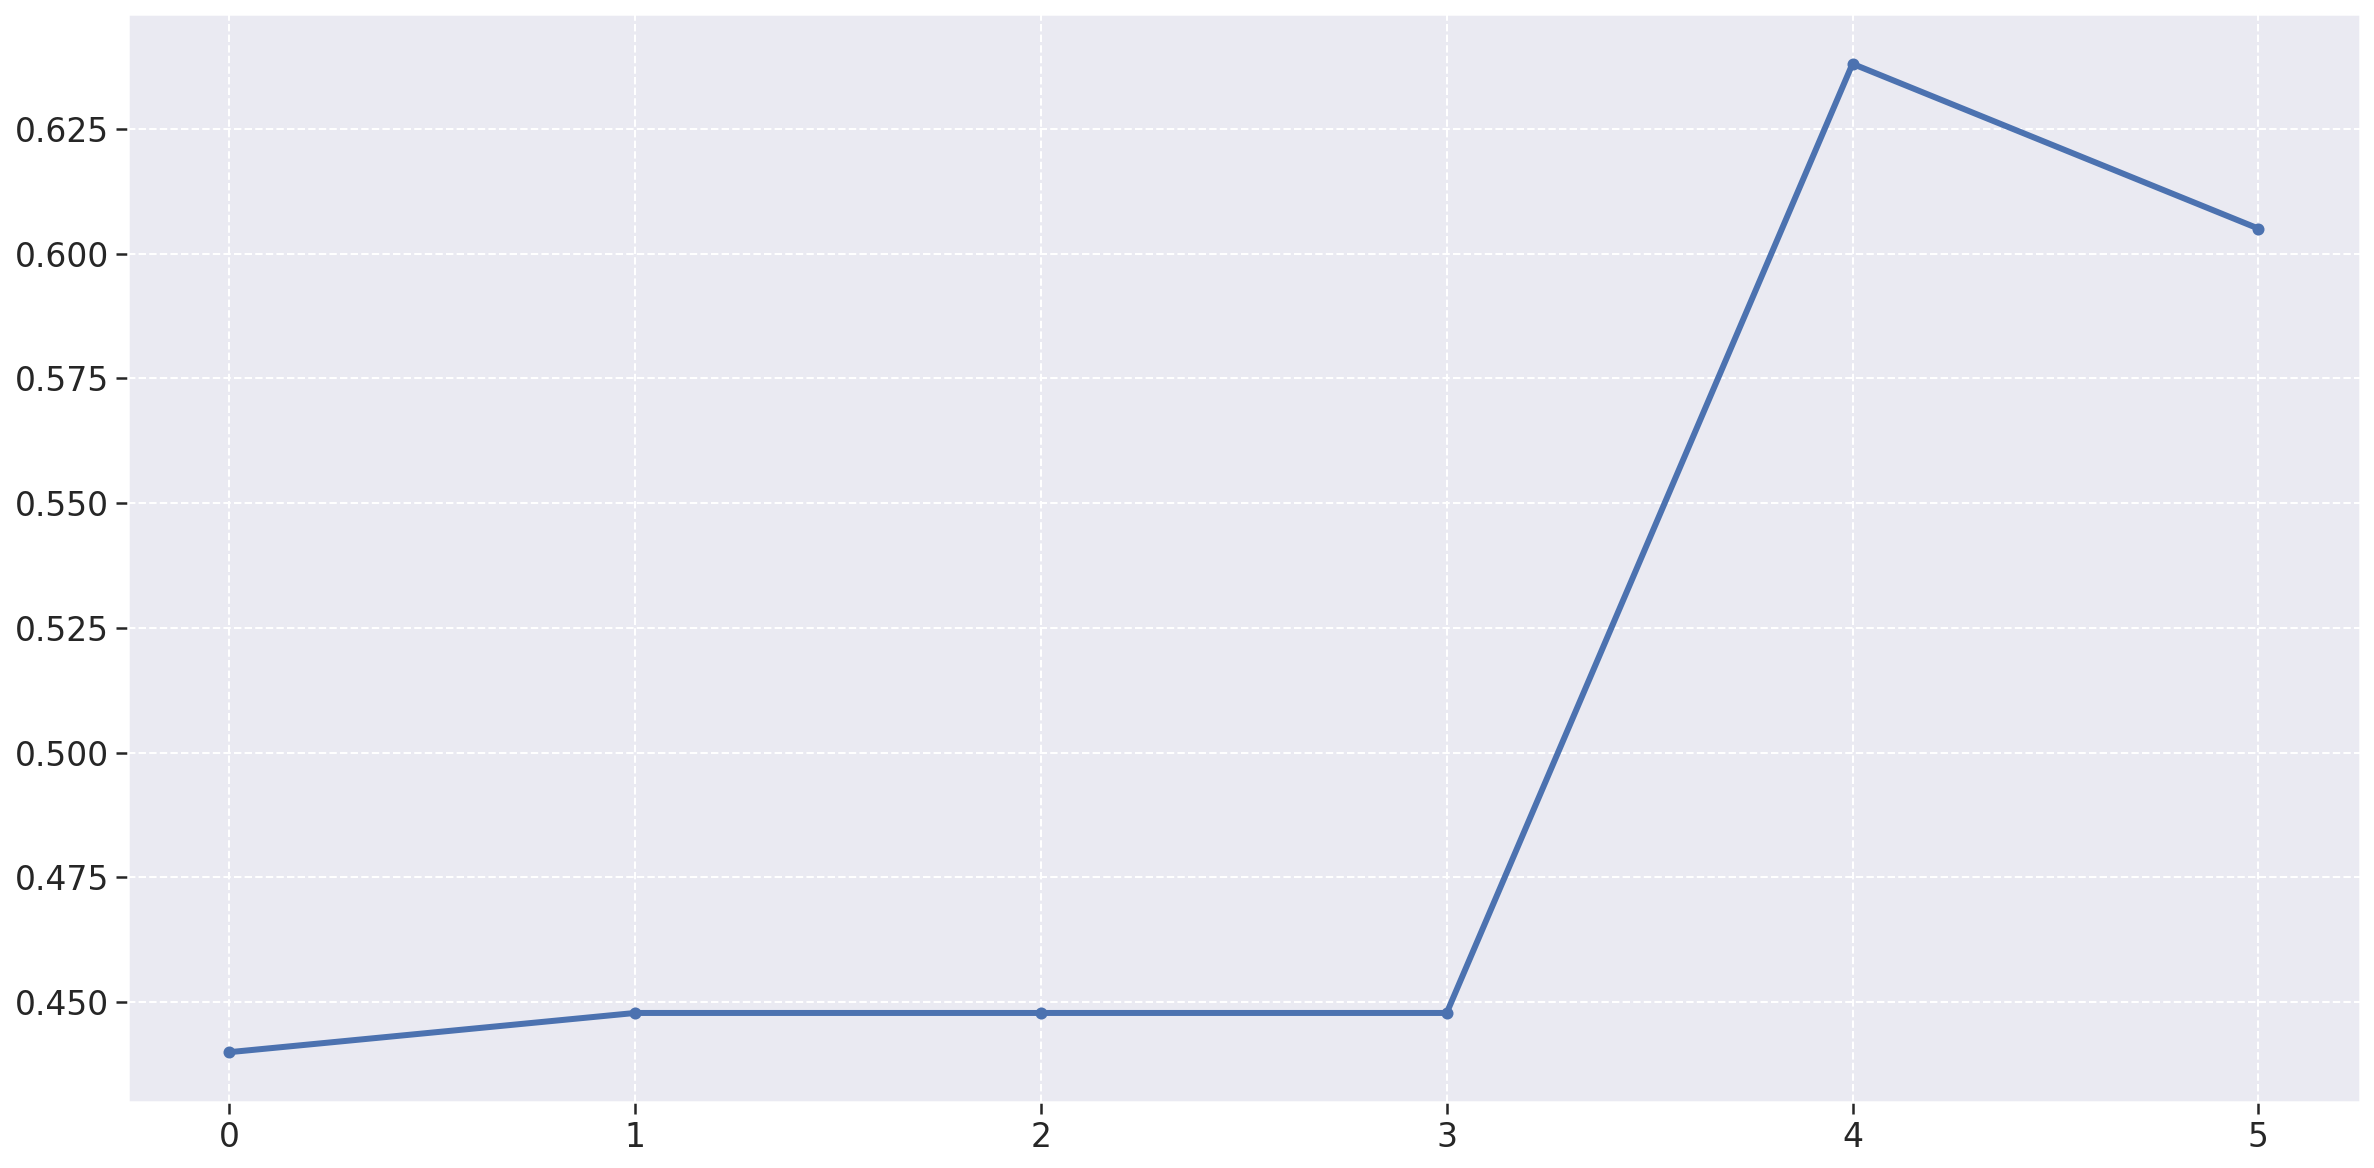

In [52]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['total'], linewidth=3, marker='o', markersize=5)

# plt.ylim(.4,.7)

# Metrics to file

In [119]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

In [120]:
now = datetime.now()
now_str = now.strftime("%d-%m-%Y-%H-%M")

metrics_df.to_csv('./data/fga-eps-mds-2021-1-PC-GO1-qualidade-total-produto-{}.csv'.format(now_str), index = False)